In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:

from notebook import *
# if you get something about NUMEXPR_MAX_THREADS being set incorrectly, don't worry.  It's not a problem.

<div class="namebox">    
Double Click to edit and enter your

1.  Name
2.  Student ID
3.  @ucsd.edu email address
    
</div>

<div style=" font-size: 300% !important;
    margin-top: 1.5em;
    margin-bottom: 1.5em;
    font-weight: bold;
    line-height: 1.0;
    text-align:center;">Lab 3: The Memory Hierarchy</div>


The next two labs will explore the impact of memory accesses on program performance. By the end of them, you should have clearer understanding of the critical impact that a program's memory behavior has on its performance. In particular, you'll learn about the concepts of:

1.  Memory alignment
2.  Thinking in cache lines
3.  Working sets
4.  The cache hierarchy
5.  The impact of miss rate on performance
6.  The role of the TLB in determining performance 
7.  Spatial locality
8.  Temporal locality
9.  Cache-aware optimizations
10.  The impact of data structures on memory behavior

Along the way, we'll address several of the "interesting questions" we identified in the first lab, including:

* Why does increasing the size of array change `CPI`? And why does this change occur so quickly?
* How and why do the datatypes we use change `IC` and  `CPI`?
* Why does the order in which the program performs calculations affect `CPI`?

This lab includes a programming assignment. 

Check the course schedule for due date(s).

# FAQ and Updates

* There are no updates, yet.

# Additional Reading

If, after these two labs, you still thirst for practical knowledge about using memory effectively, you should should read this series of articles:  [What every programmer should know about memory](https://lwn.net/Articles/250967/).  It's long but quite good.  It's not required reading, but, for the programming assignments that say "make this code go as fast you can," everything it includes is fair game.

# Pre-Lab Reading Quiz

Part of this lab is a pre-lab quiz. The pre-lab quiz **has moved to Canvas** so I can allow multiple attempts.  It is due **before class on the day the lab is assigned**.  It's not hard, but it does require you to read over the lab before class.  If you are having trouble accessing it, make sure you are **logged into Canvas**.

##  How To Read the Lab For the Reading Quiz

The goal of reading the lab before starting on it is to make sure you have a preview of:

1.  What's involved in the lab.
2.  The key concepts of the lab.
3.  What you can expect from lab.
4.  Any questions you might have.

These are the things we will ask about on the quiz.  You _do not_ need to study the lab in depth.  You _do not_ need to run the cells.

You should read these parts carefully:

* Paragraphs at the top of section/subsections
* The description of the programming assignment
* Any other large blocks of text
* The "About Labs in This Class" section (Lab 1 only)

You should skim these parts:

* The questions.

You can skip these parts:

* The "About Labs in This Class" section (Labs other than Lab 1)
* Commentary on the output of code cells (which is most of the lab)
* Parts of the lab that refer to things you can't see (like cell output)
* Solution to completeness questions.


## Taking the Quiz

You can find it here: https://canvas.ucsd.edu/courses/29567/quizzes

The quiz is "open lab" -- you can search, re-read, etc. the lab.

You can take the quiz 3 times.  Highest score counts.

# Browser Compatibility

We are still working out some bugs in some browsers.  Here's the current status:

1.  Chrome -- well tested.  Preferred option. **Required for Moneta**
2.  Firefox -- seems ok, but not thoroughly tested.
3.  Edge -- seems ok, but not thoroughly tested.
4.  Safari -- not supported at the moment.
5.  Internet Explorer -- not supported at the moment.

At the moment, the authentication step must be done in Chrome.  You usually _will not_ have to re-authenticate between labs, so if things work OK for the first, things will probably work here. 

# About Labs In This Class

_This section is the same in all the labs.  It's repeated here for your reference._

Labs are a way to **learn by doing**.  This means you _must_ **do**.  I have built these labs as Jupyter notebooks so that the "doing" is as easy and seamless as possible.

In this lab, what you'll do is answer questions about how a program will run and then compare what really happened to your predictions.  Engaging with this process is how you'll learn.  The questions that the lab asks are there for several purposes:

1.  To draw your attention to specific aspects of an experiment or of some results.
2.  To push you to engage with the material more deeply by thinking about it.
3.  To make you commit to a prediction so you can wonder why your prediction was wrong or be proud that you got it right.
4.  To provide some practice with skills/concepts you're learning in this course.
5.  To test your knowledge about what you've learned.

The questions are graded in one of three ways:

1. "Correctness" questions require you to answer the question and get the correct answer to get full credit.
2. "Completeness" questions require you to answer the question.
3. "Optional" questions are...optional.  They are there if you want to go further with the material.

Some of the "Completeness" problems include a solution that will be hidden until you click "Show Solution".  To get the most from them, try them on your own first.

Many of the "Completeness" questions ask you to make predictions about the outcome of an experiment and write down those predictions.  To maximize your learning, think carefully about your prediction and commit to it.  **You will never be penalized for making an incorrect prediction.**

You are free to discuss "Completeness" and "Optional" questions with your classmates.  You must complete "Correctness" questions on your own.

If you have questions about any kind of question, please ask during office hours or during class.

## How To Succeed On the Labs

Here are some simple tips that will help you do well on this lab:

1.  Read/skim through the entire lab _before_ class.  If something confuses you, you can ask about it.
2.  Start early.  Getting answers on edstem/piazza can take time.  So think through the lab questions (and your questions about them) carefully.
    1. Go through the lab once (several days before the deadline), do the parts that are easy/make sense
    2. Ask questions/think about the rest
    3. Come back and do the rest.
3.  Start early.  The DSMLP cluster gets busy and slow near deadlines.  "The cluster was slow the night of the deadline" is not an excuse for not getting the lab done and it is not justification for asking for an extension.
4.  Follow the guidelines below for asking answerable questions on edstem/piazza.

You may think to yourself: "If I start early enough to account for all that, I'd have to start right after the lab was assigned!"  Good thought!

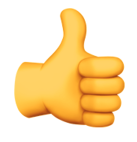


<div class="alert alert-block alert-danger">

**The Cluster Will Get Slow** DSMLP and our cloud machines will get crowded and slow _before every deadline_.  This is completely predictable.  DSMLP can also get crowded due to deadlines in other courses.  You need to start early so you can avoid/work around these slowdowns.  Unless there's some kind of complete outage, we will not grant extensions because the servers are crowded.
    
</div>

## Getting Help

You might run into trouble while doing this lab.  Here's how to get help:

1.  Re-read the instructions and make sure you've followed them.
2.  Try saving and reloading the notebook.
3.  If it says you are not authenticated, go to the [the login section of the lab](#Logging-In-To-the-Course-Tools) and (re)authenticate.
4.  If you get a `FileNotFoundError` make sure you've run all the code cells above your current point in the lab.
4.  If you get an exception or stack dump, check that you didn't accidentally modify the contents of one of the python cells.
5.  If all else fails, post a question to edstem/piazza.

## Posting Answerable Questions on Edstem/Piazza

If you want useful answers on edstem/piazza, you need to provide information that is specific enough for us to provide a useful answer.  Here's what we need:

1.  Which part of which lab are you working on (use the section numbers)?
2.  Which problem (copy and paste the _text_ of the question along with the number).

If it's question about instructions:

1.  Try to be as specific as you can about what is confusing or what you don't understand (e.g., "I'm not sure if I should do _X_ or _Y_.")

If it's a question about an error while running code, then we need:

1.  If you've committed anything, your github repo url.
2.  If you've submitted a job with `cse142` you _must_ provide the job id.  It looks like this: `544e0cf2-4771-43c3-86f8-1c30d7af601f`.  With the id, we can figure out just about anything about your job.  Without it, we know nothing.
3.  The _entire_ output you received.  There's no limit on how long an edstem/piazza post can be.  Give us all the information, not just the last few lines.  We like to scroll!

For all of the above **paste the text** into the edstem/piazza question.  Please **do not provide screen captures**.  The course staff refuses to type in job ids found in screen shots.


<div class="alert alert-block alert-danger">

**We Can't Answer Unanswerable Questions** If you don't follow these guidelines (especially about the github repo and the job id), we will probably not be able to answer your question on edstem/piazza.  We will archive it and ask you to re-post your question with the information we need.
    
</div>

## Keeping Your Lab Up-to-Date

Occasionally, there will be changes made to the base repository after the
assignment is released.  This may include bug fixes and updates to this document.  We'll post on piazza/edstem when an update is available.

In those cases, you can use the following commands to pull the changes from upstream and merge them into your code.  You'll need to do this at a shell.  It won't work properly in the notebook.  Save your notebook in the browser first.


```
cd <your directory for this lab>git remote add upstream $(cat .starter_repo)  # You need to do this once each time you checkout a new lab. It will fail 
                                              # harmlessly if you run it more than once.
cp Lab.ipynb Lab.backup.ipynb                 # Backup your work.
git commit -am "My progress so far."          # commit your work.
git pull upstream main --allow-unrelated-histories -X theirs # pull the updates
```

Or you can use the script we provide:

```
./pull-updates
```


Then, reload this page in your browser.

## How To Use This Document

You will use Jupyter Notebook to complete this lab.  You should be able to do much of this lab without leaving Jupyter Notebook.  The main exception will be some of the programming assignments.  The instructions will make it clear when you should use the terminal.

### Logging In

If you haven't already, you can go to [the login section of the lab](#Logging-In-To-the-Course-Tools) and follow the instructions to login into the course infrastructure.

### Running Code

Jupyter Notebooks are made up of "cells".  Some have Markdown-formatted text in them (like this one).  Some have Python code (like the one below).

For code cells, you press `shift-return` to execute the code.  Try it below:

In [ ]:
print("I'm in python")

Code cells can also execute shell commands using the `!` operator.  Try it below:

In [ ]:
!echo "I'm in a shell"

### Telling What The Notebook is Doing

The notebook will only run one cell at a time, so if you press `shift-return` several times, the cells will wait for one another.  You can tell that a cell is waiting if it there's a `*` in the `[]` to the left the cell:

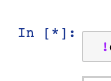


You'll can also tell _where_ the notebook is executing by looking at the table of contents on the left.  The section with the currently-executing cell will be red:

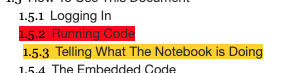

### What to Do Jupyter Notebook It Gets Stuck

First, check if it's actually stuck: Some of the cells take a while, but they will usually provide some visual sign of progress.  If _nothing_ is happening for more than 10 seconds, it's probably stuck.

To get it unstuck, you stop execution of the current cell with the "interrupt button":

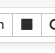

You can also restart the underlying python instance (i.e., the confusingly-named "kernel" which is not the same thing as the operating system kernel) with the restart button:

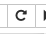

Once you do this, all the variables defined by earlier cells are gone, so you may get some errors.  You may need to re-run the cells in the current section to get things to work again.

You can also try reloading the web page.  That will leave Python kernel intact, but it can help with some problems.

### Common Errors and Non-Errors

1.  If you get `sh: 0: getcwd() failed: no such file or directory`, restart the kernel.
2.  If you get `INFO:MainThread:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.`.  It's not a real error.  Ignore it. 
3.  If you get a prompt asking `Do you want to cancel them and run this job?` but you can't reply because you can't type into an output cell in Jupyter notebook, replace `cse142 job run` with `cse142 job run --force`. (see useful tip below.)
4.  If you get an `Error: Your request failed on the server: 500 Server Error: Internal Server Error for url=http://cse142l-dev.wl.r.appspot.com/file`, trying running the job again.
5.  Sometimes `cse142 job run` will just sit there and seemingly do nothing.  Weirdly, interrupting the kernel (button above) seems to jolt it awake and cause it to continue.
6.  If you get an error like this, stop your datahub server and restart it.

![image.png](attachment:image.png)

7. If you get `http.cookiejar.LoadError: '/home/youruserrname/.djr-cookies.txt` does not look like like a Netscape format cookies file.` remove the file and re-authenticate.

### Useful Tips

1.  If you need to edit a cell, but you can't you can unlock it by pressing this button in the tool bar (although you probably shouldn't do this because it might make the lab work incorrectly.  A better choice is to copy and paste the cell, _and then_ unlock the copy):
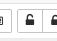

### The Embedded Code

The code embedded in the lab falls into two categories:

1.  Code you need to edit and understand.
2.  Code that you do not need to edit or understand -- it's just there to display something for you.

For code in the first category, the lab will make it clear that you need to study, modify, and/or run the code.  If we don't explicitly ask you to do something, you don't need to.

Most of the code in the second category is for drawing graphs.  You can just run it with shift-return to the see the results.  If you are curious, it's mostly written with `Pandas` and `matplotlib`. The code is all in `notebook.py`.   These cells should be un-editable.  However, if you want to experiment with them, you can copy _the contents_ of the cell into a new cell and do whatever you want (If you copy the cell, the copy will also be uneditable).

<div class="alert alert-block alert-info">

**Most Cells are Immutable** Many of the cells of this notebook are uneditable. The only ones you should edit are some of the code cells and the text cells with questions in them.
</div>

<div class="alert alert-block alert-info">

**Pro Tip** The "carrot" icon in the lower right (shown below) will open a scratch pad area.  It can be a useful place to do math (or whatever else you want.
    
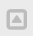
</div>

### Showing Your Work

Several questions ask you to show your work for calculations.  We don't need anything fancy.  Many of the questions ask you to compute something based on results of an experiment.  Your experimental results will be different than others', so your answer will be different as well.

To make it possible to grade your work (and give you partial credit), we need to know where your answer came from.  This why you need to show your work.  For instance this would be fine as answer to "On average, how many weeks do you have per lab?":

```
Weeks in quarter/# of labs = 10/5 = 2 weeks/lab
```

2 significant figures is sufficient in all cases, but you can include more, if you want.

If you are feeling fancy, you can use LaTex, but it's not at all required.

When it's appropriate, you can also paste in images.  However, Jupyter Notebook is flaky about it.  Save your notebook by clicking the disk icon:

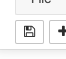

### Answering Questions

Throughout this document, you'll see some questions (like the one below).  You can double click on them to edit them and fill in your answer.  Try not to mess up the formatting (so it's easy for us to grade), but at least make sure your answer shows up clearly.  When you are done editing, you can `shift-return` to make it pretty again.

A few tips, pointers, and caveats for answering questions:

1. The answers are all in [github-flavored markdown](https://guides.github.com/features/mastering-markdown/) with some html sprinkled in.  Leave the html alone.
2. Many answers require you to fill in a table, and many of the `|` characters will be missing.  You'll need to add them back.
3. The HTML needs to start at the beginning of a line.  If there are spaces before a tag, it won't render properly.  If you accidentally add white space at the beginning of a line with an html tag on it, you'll need to fix it.
4. Text answers also need to start at the beginning of a line, otherwise they will be rendered as code.
5. Press `shift-return` or `option-return` to render the cell and make sure it looks good.
6. There needs to be a blank line between html tags and markdown.  Otherwise, the markdown formatting will not appear correctly.


You'll notice that there are three kinds of questions: "Correctness", "Completeness", and "Optional".  You need to provide an answer to the "Completeness" questions, but you won't be graded on its correctness.  You'll need to answer "Correctness" questions correctly to get credit.  The "Optional" questions are optional.

# Logging In To the Course Tools

    
In the course you will use some specialized tools to let you perform detailed measurements of program behavior.  To use them you need to login with your `@ucsd.edu` email address using the instructions below. **You need to use the email address that appears on the course roster.  That's the email address we created an account for.  In almost all cases, this is your `@ucsd.edu` email address.**

You'll do this periodically when you get an error about not being authenticated.  You can return to this notebook (or any other of the lab notebooks) to login at any time.

Here's what to do:

1.  Enter your `@ucsd.edu` email address in quotes after `login` below.  It'll take a few seconds to load.
2.  Click the google "G" login button below and login with your `@ucsd.edu` email address. 
3. **Click the google button regardless of whether it says "sign in" or "signed in".  Then be sure to select your `@ucsd.edu account` if it shows you multiple google acocunts**
4. You'll see a very long string numbers an letters appear above.  Click "Copy it" to copy it.

**Note:** If it doesn't give you a choice about which account to log into and authentication fails, that means you are logged into a single Google account and that account is _not_ your `@ucsd.edu` account.  You'll have to log into your `@ucsd.edu` through Gmail or through Chrome's account manager and then try again.

<div class="alert alert-block alert-danger">

**Use Chrome** The login process doesn't seem to work properly with Safari or Firefox.  Use Chrome to login.  You can use any of the other compatible browsers you want for the doing the rest of the lab, and it should be fine.

</div>



In [ ]:
login("<Your @ucsd.edu email address>") 


Next step:  Paste it below between the quote marks.  Press `shift-return`.

In [ ]:
token("your_token") 



It should have replied with

``` 
You are authenticated as <your email>
```

You are now logged in!  Try submitting a job: 

In [ ]:
!cse142 job run "echo Hello World"

If you see "Hello World", you're all set.  Proceed with the lab!

<div class="alert alert-block alert-danger">

Delete your token from the above cell. Because your token is esssentially your username and password combined, you should treat it like a password or ssh private key.  **Sharing your token with another student or posessing another student's token is an AI violation**.
</div>

# Grading

Your grade for this lab will be based on the following components

| Part                       | value |
|----------------------------|-------|
| Reading quiz               | 3%    |
| Jupyter Notebook           | 45%   |
| Programming Assignment     | 50%   |
| Post-lab survey.           | 2%    |

No late work or extensions will be allowed.

We will grade 5 of the "completeness" problems.  They are worth 3 points each.  We will grade all of the "correctness" questions.

You'll follow the directions at the end of the lab to submit the lab write up and the programming assignment through gradescope. 

Please check gradescope for exact due dates.

# New Tools

## Visualizing Memory Traces With Moneta

<div class="alert alert-block alert-danger">

**Note**:  Moneta works best with Chrome.  If you have trouble using it, please try Chrome.
    
</div>

<div class="alert alert-block alert-danger">
    
**Note**: Moneta takes a lot of memory.  If your datahub session crashes while using Moneta, that means you tried to look a trace that was too big.  We've limited the size of the trace we collect with the commands in the lab, and things should be mostly fine.  If you create larger traces, you may run into problems.
    
</div>
   
In this lab, we'll be using a tool called Moneta to visualize the memory accesses that a program makes.  This will make it easier to see what a program is doing, and lets you develop your intuition for ideas like spatial locality, temporal locality, and working set size.

There are a couple of important aspect of Moneta that limit how many memory operations we can study at once.  

1. The first is that Moneta is _trace based_.  Tracing is a common technique for understanding computer performance.  A _trace_ is the general idea of a record of program behavior.  For Moneta, the trace is a file that contains a list of all the memory accesses the program made and some information about them.  Since modern processors can execute billions of instruction per second (many of which are memory accesses), traces can get very big, very fast.  This means we will have to collect traces of just small portions of a program's execution -- otherwise, we'll fill up the file system on DSMLP.

2. To generate traces, Moneta uses a technique called _binary instrumention_ which rewrites the executable to add some extra functionality.  For Moneta, the extra functionality is writing each memory access to a file.  Writing something to file can take thousands of instructions, so instrumenting a binary to produce a trace slows down execution _dramatically_.  So, that's another reason we will only collect relatively small traces.

3. Finally, Moneta includes a graphical _trace viewer_ (that runs in a Jupyter Notebook, conveniently enough).  The viewer has to load the entire trace into memory.  If the trace is too big, your Jupyter Notebook will crash, and your datahub session will abruptly stop working.  This is likely to happen to you at least once.  It is annoying.  I apologize in advance.  The way to avoid it is to use small traces.

Since instrumenting a binary to collect the trace slows it down so much, we cannot simultaneously measure a program's performance _and_ collect a trace of its execution.

Enough about the implementation and limitations, let's see what Moneta can do.

Here's a fiddle with a simple program that takes an array and fills it with integers.  There some extra stuff in here as well:

1. `TAG_START` and `TAG_STOP` are special functions that tell Moneta to label a set of memory accesses so we can look at them later.
2. `#include "pin_tags.h"` defines `TAG_START` and `TAG_STOP`.  (If you're curious, it's at `/cse142L/CSE141pp-Tool-Moneta/moneta/pin_tags.h`.  The implementations of the functions are interesting.)

`TAG_START` takes a tag name (`the-array`), a starting address (`data`), and an ending address (`&data[size]`).  The final argument should be `false` for now.  With this tag in place, the trace will record which accesses occurred between those two addresses and between the calls to `TAG_START` and `TAG_STOP`.  We'll see why tagging is important in a moment.

Run the cell below, study the code, and answer the question.  Then, we'll take a look at the trace.

In [ ]:
t = fiddle("array.cpp", function="array", run=["moneta"], opt="-O3", cmdline=r"--size 1000",
code=r"""
#include"pin_tags.h"
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* array(uint64_t * data, uint64_t size) {
    TAG_START("the-array", data, &data[size], false);
    for(unsigned int i = 0; i < size; i++) {
        data[i] = -i;
    }
    TAG_STOP("the-array");
    return data;
}

FUNCTION(one_array, array);
""")
compare([t.source, t.cfg])

<div class="question correctness points-3">

<div class="question-text">

Based on the assembly and the source code and assuming `size = 1000`:  How many instruction will execute in `array()`?  How many memory operations would you expect `array` to perform on `data`?  How many bytes of memory will be accessed? (Ignore instructions in functions that get called. Show your work.)

</div>
    
<div class="answer">

**How many instructions?:** 

**How many accesses?:** 

**How many bytes accessed?:** 
    
</div>
</div>

In [ ]:
show_trace(t.mtrace, show_tag="the-array")

This is the Moneta interactive trace viewer.  Primarily, it's a graph.  The horizontal axis is "access number".  Moneta numbers memory accesses as it records them.  Program execution runs from left to right along the X axis which corresponds roughly to time.

The vertical axis is the _address offset_.  Moneta's traces record the 64-bit address of every memory access, but those numbers are almost impossible to interpret.  So, Moneta just plots the relative position of the accesses on the screen.  The "Base address" value is the address that corresponds to 0 on the plot.

The viewer is interactive and the bar at the top provides several tools:

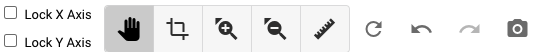

From left to right they are:

* Check boxes to lock the x or and y axes.
* Pan the image.
* Zoom to selected region
* Zoom in
* Zoom out
* Measure memory accesses in an area
* Reset zoom to show entire trace
* Go to previous zoom settings.
* Go to next zoom settings.
* Take a snapshot of the plot.

<div class="question completeness">

<div class="question-text">

Based on the graph, how many memory accesses did `array` perform?  How many bytes did it access?
</div>
    
<div class="answer">

**How many accesses?:**

**How many bytes accessed?:**
    
</div>
</div>

<div class="solution">
    
Method 1:
    
To count accesses, look at the x axis:

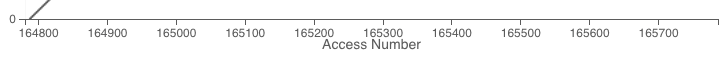
    
The max value is about 1000 larger than the minimum value.
    
</div>

<div class="_solution">
    
To count bytes accessed, look at the y axis:

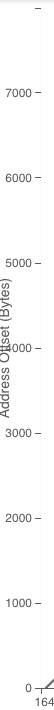

ALthough it's cut off, the max values is about 8000, so the program accessed that many bytes.
    
</div>

<div class="_solution">
    
Method 2: 

Use the measurement tool (the ruler icon) and select the whole area:
    
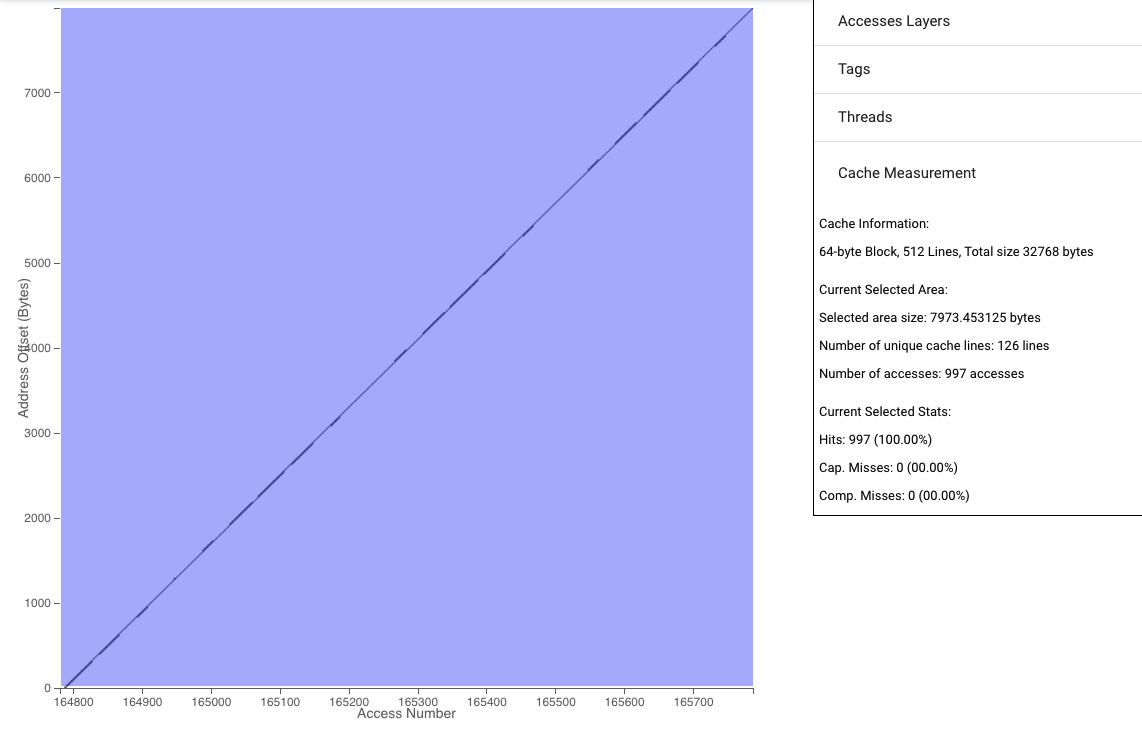
    
On the right under "Cache Measurement" it has "selected area size" and "number of accesses".
</div>

To see why we need tags, you can reset the zoom to show the entire trace.  You'll see some horizontal lines at the very top and bottom of the graph.  Roughly speaking, the call stack is at the top and grows down, while the heap (where `new` allocates memory) is at the bottom.  Note the span of the vertical axis:  My plot shows a range of $4.5\times 10^{13}$ bytes or about 40TB.  The address space is huge!  This is why we need tags.  It's really hard to find anything otherwise.

<div class="alert alert-block alert-success">
    
**Interesting Question:**  How can the program access a range of memory addresses that is vastly larger than the amount of memory on the machine?
    
</div>

Play around with the viewer a bit, but there are more interesting traces to come.

## Measuring Cache Performance with Performance Counters

We'll use performance counters to measure cache performance on our bare metal machines in the cloud.  We'll use the same tools we've used so far to measure `IC`, `CPI`, and `CT`.

Let's measure the cache behavior of `array` from the example above.  Here's the same example again:

In [ ]:
t = fiddle("array.cpp", function="array", run=["perf_count"], opt="-O3", cmdline=r"--size 1024 4096 8192 --MHz 3500", perf_cmdline="--stat-set L1.cfg",
code=r"""
#include"pin_tags.h"
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* array(uint64_t * data, uint64_t size) {
    TAG_START("the-array", data, &data[size], false);
    for(unsigned int i = 0; i < size; i++) {
        data[i] = -i;
    }
    TAG_STOP("the-array");
    return data;
}

FUNCTION(one_array, array);
""")
compare([t.source, t.cfg])

<div class="question completeness">

<div class="question-text">

If `size == 8192`, how many total cache misses do think will occur during the execution of `array()`? (assume the cache is empty to begin and that cache lines are 64 bytes).
</div>
    
<div class="answer">

**Misses for size 8192:** 
    
**Average misses per instruction in this loop:**
    
</div>
</div>

<div class="solution">
    
The assembly shows that the loop body has eight instructions.  Since the loop will execute 8192 times, we can expect about $8192 \times 8 = 65536$ instructions to execute. In reality, there will be a few more, since we are ignoring the function prologue and epilogue.  Of these only the `movq` is a memory operation.  It will execute 8192 times.

Both the source code and the assembly show us in several ways that each element of the array is 8 bytes.  The source uses `uint64_t` which is a 64-bit data type.  In the assembly, the `movq` uses the `(r1, r2, n)` addressing mode which computes `r1 + r2 * n`.  In this case, so it's accessing every 8th byte. Also the `q` suffix on the `movq` shows us it's a quadword access (8 bytes).

The code also shows that we are accessing _consecutive_ 8-byte values.  There are eight of these in each 64-byte cache line.  When we access the first 8-byte value in a cache line we can expect a _compulsory_ miss that brings in 64 bytes of data.  So, the following 7 accesses will  be hits.  So roughly 1/8 = 12.5% of cache accesses will be misses.  This means there will be about $0.125 * 8192/65536 = 0.016$ cache misses per instruction and 1024 cache misses.

Run the cell below to see the measurements.
<div>

In [ ]:
display(render_csv(t.stats, columns=["function","size", "IC", "CPI", "CT","ET", "L1_MPI", "L1_cache_misses"]))

<div class="_solution">
    
The `L1_cache_misses` column has the number of L1 cache misses.  `L1_MPI` is the ratio of cache misses per instruction executed.

As you can see our estimate is very good for large array sizes.   For smaller sizes, the actual number is higher due to extra instruction executed before and after `array`.
</div>

## Tensors

In this lab and future labs, we'll be using a data structure called a _tensor_.  Tensors are a hot topic nowadays (you may have heard of the TensorFlow programming system from Google that accompanies their Tensor Processing Unit specialized processor), but at their heart they are not complicated:  They are just multi-dimensional arrays.

We'll be using a 4-dimensional tensor data type called `tensor_t`.  It's defined in `/cse142L/CSE141pp-SimpleCNN/CNN/tensor_t.hpp`.  Here's the key parts of the source code:

```c++

template<typename T>
struct tensor_t
{

	tdsize size;
	T * data;
	
	tensor_t( int _x, int _y, int _z, int _b ) :  size(_x, _y, _z, _b) {
		data = new T[size.x * size.y * size.z * size.b]();
	}

  	T& get( int _x, int _y, int _z, int _b=0 ) {		
		return data[
			_b * (size.x * size.y * size.z) +
			_z * (size.x * size.y) +
			_y * (size.x) +
			_x
			];
	}
};
```

Note that `tensor_t` is a template, so we can have tensors of many different types: `tensor_t<int>`, `tensor_t<float>`, etc.

Although `tensor_t` is 4-dimensional, it stores its contents in a one-dimensional array of `T` called `data`.  The `get()` method maps coordinates into that linear array and returns a reference to the corresponding entry.  Since `get()` returns a reference, we can say things like:

```c++
tensor_t<float> t(10, 10, 10, 10);
t.get(1,2,3,4) = 4.0;
float s = t.get(1,2,3,4);
```

<div class="question correctness points-2"> 

<div class="question-text">

Given the following `tensor_t` declarations and accesses, compute the total size of the tensor in element and bytes, and the index (starting at 0) of the corresponding data elements in the `data` array.
    
</div>
   
<div class="answer">

1.  `tensor_t<uint32_t>(3,5,6,7)`
    1. Total elements:  
    2. Total bytes: 
    3. `get(1,0,0,0)`: 
    4. `get(0,1,0,0)`: 
    5. `get(0,0,1,0)`: 
    6. `get(0,0,0,1)`: 
2.  `tensor_t<double>(2,4,8,16)`
    1. Total elements:  
    2. Total bytes: 
    3. `get(1,3,2,4)`: 
    4. `get(2,2,1,7)`: 
            
</div>

</div>

Here's a simple example of using a `tensor_t<uint32_t>` as a 2-dimensional array.  The `z` and `b` dimensions have a size of 1, so they act as if they don't exist.

In [ ]:
t = fiddle("tensor.cpp", function="tensor", run=["moneta"], tagged_only=True, opt="-O1", cmdline=r"--size 1000",
code=r"""
#include"pin_tags.h"
#include"CNN/tensor_t.hpp"
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* tensor(uint64_t * data, uint64_t size) {

    tensor_t<uint32_t> t(4,8,1,1);
    TAG_START("init", t.data, &t.as_vector(t.element_count()), false);
    
    for(uint y = 0; y < 8; y++) {
        for(uint x = 0; x < 4; x++) {
            t.get(x,y,0,0) = x;
        }
    }

    TAG_STOP("init");
    return data;
}

FUNCTION(one_array, tensor);
""")
compare([t.source, t.cfg])
show_trace(t.mtrace, show_tag="init")

The  graph is zoomed _way_ in so you can see individual accesses and memory locations.  If you look carefully, you can see that each element of the tensor is 4-bytes.   You can also see that, as we iterate through the `x` and `y` dimensions, the memory accesses move sequentially through a continuous region of memory.  If you look carefully at assembly for the loop, you'll see a nice example of function inlining and constant propagation. 

## The Miss-Machine

We're going to need to generate some cache misses very efficiently in this lab.  It's actually pretty hard to reliably create cache misses efficiently, especially if you want to out-smart modern cache hardware mechanisms like prefetchers.  We also need to precisely control the amount of memory it touches.  You could use a random number generator, but even the simplest ones are pretty computationally intensive.  Instead, we are going to use a clever data structure that I don't think has an official name, so I'm going call it the "miss machine".

The miss-machine is a circular linked list.  The links are allocated in a block (corresponding to the memory footprint we want) and then formed into a circular linked list.  Then, you set the `next` pointer so that the list jumps around at random, hitting every link, and eventually returning to the start.  Then, if you want cache misses, you just traverse the list for as long as you like.  The sequence of addresses is (as near as the cache can tell) random, and the code required is extremely small -- just a few instruction are sufficient.

Here's an implementation.  Read through the code and comments carefully.

In [ ]:
t = fiddle("miss_machine.cpp", function="miss_machine", opt="-O1 ", run=['perf_count'],
code=r"""
#include<cstdint>
#include<vector>
#include<algorithm>
#include"function_map.hpp"
  
struct MM {
    struct MM* next;  // I know that pointers are 8 bytes on this machine.
    uint64_t junk[7]; // This forces the struct MM to take a up a whole cache line, abolishing spatial locality.
};

extern "C"
struct MM * miss(struct MM * start, uint64_t count) {
    for(uint64_t i = 0; i < count; i++) { // Here's the loop that does this misses. It's very simple.
        start = start->next;
    }
    return start;
}


extern "C"
uint64_t* miss_machine(uint64_t * data, uint64_t size, uint64_t arg1) {
#define ARRAY_SIZE (8*1024)
    auto array = new struct MM[8*1024]; // This is bigger than the L1
    
    // This is clever part  'index' is going to determine where the pointers go.  We fill it consecutive integers.
    std::vector<uint64_t> index;
    for(uint64_t i = 0; i < ARRAY_SIZE; i++) {
        index.push_back(i);
    }
    // Randomize the list of indexes.
    std::random_shuffle(index.begin(), index.end());

    // Convert the indexes into pointers.
    for(uint64_t i = 0; i < ARRAY_SIZE; i++) {
        array[index[i]].next = &array[index[(i + 1) % ARRAY_SIZE]]; 
    } 

    MM * start = &array[0];
    start = miss(start, 1024*1024*128); // 128 million accesses.
    return reinterpret_cast<uint64_t*>(start); // This is a garbage value, but if we don't return it, the compiler will optimize out the call to miss.
} 

FUNCTION(one_array_1arg, miss_machine);
""", cmdline=f"--size 1024", perf_cmdline="--stat-set L1.cfg --MHz 3500")
display(t.source)
f = fiddle("miss_machine.cpp", function="miss", opt="-O1")


Here's the assembly for `miss()`

In [ ]:
display(f.cfg)

<div class="question completeness"> 

<div class="question-text">

Based on this code, how many misses per instruction would you expect this code to produce?  We'll call this metric `L1_MPI`.  It's just the number of L1 cache misses divided by `IC`.
    
</div>
   
<div class="answer">

**`L1_MPI`**:
    
</div>

</div>

<div class="solution">
    
Amdahl's Law tells us that the common case matters most.  The loop body will execute millions of times while the rest of the basic blocks execute just once, so that's what we'll focus on.

It has four instructions, and just one of them (the `mov`) is a memory access.  It's a load from the `next` pointer.  We've constructed the miss machine to make that access a miss, so hopefully it'll miss almost every time.
    
So that means that 1/4 of the instructions in the loop body will be misses.  Hence, `L1_MPI = 0.25`.
    
</div>

Here's the results:

In [ ]:
display(render_csv('miss_machine.csv', columns=["IC", "L1_cache_misses", "L1_MPI", "CPI"]))

A few things are notable: `L1_MPI` and `CPI` are the largest numbers we have seen to date.  The miss machine works (But it could work better).

<div class="question optional"> 

<div class="question-text">

Modify the fiddle above to get `L1_MPI` above 75%.  Think about how you would modify the assembly to increase `L1_MPI`.  How can you make that happen _without_ manually editing the assembly?
    
</div>

</div>

# Thinking in Cache Lines

One of the central issues in cache-aware programming (i.e., crafting your code to make efficient use of the memory hierarchy) is understanding "how much" memory your program (or part of it) is using and "how big" a particular data structure (e.g., an array) is, and how often your program accesses memory.  It turns out there are a surprising number of ways to measure these things and the answers can be unexpectedly surprising and non-intuitive.  Not only that, the most obvious ways to measure these characteristics are not the most useful if you're interested in fully-utilizing your memory system.

So let's take a look at three questions and see how to answer them in a cache-aware way.

## How big is my data structure?

### Primitive Types

Let's start simple:  How many bytes do each of the primitive C++ data types occupy?  Here's some code to check.  It uses C's `sizeof` operator (it's not technically a function.  Why?) that tells you how many bytes something occupies.  The types listed are all the C++ primitive types.

In [ ]:
t = fiddle("primitive_sizes.cpp", function="primitive_sizes", run=["local"],
code=r"""
#include<cstdint>
#include<iostream>
#include"function_map.hpp"

extern "C"
uint64_t* primitive_sizes(uint64_t * data, uint64_t size, uint64_t arg1) {
    std::cout << "\n";
    std::cout << "sizeof(char) = " << sizeof(char) << "\n";
    std::cout << "sizeof(short int) = " << sizeof(short int) << "\n";
    std::cout << "sizeof(int) = " << sizeof(int) << "\n";
    std::cout << "sizeof(long int) = " << sizeof(long int) << "\n";
    std::cout << "sizeof(long long int) = " << sizeof(long long int) << "\n";
    std::cout << "sizeof(float) = " << sizeof(float) << "\n";
    std::cout << "sizeof(double) = " << sizeof(double) << "\n";
    std::cout << "sizeof(long double) = " << sizeof(long double) << "\n";
    std::cout << "sizeof(int8_t) = " << sizeof(int8_t) << "\n";
    std::cout << "sizeof(int16_t) = " << sizeof(int16_t) << "\n";
    std::cout << "sizeof(int32_t) = " << sizeof(uint32_t) << "\n";
    std::cout << "sizeof(int64_t) = " << sizeof(int64_t) << "\n";
    std::cout << "sizeof(int64_t*) = " << sizeof(int64_t*) << "\n";
    std::cout << "sizeof(void*) = " << sizeof(void*) << "\n";
    return data;
}

FUNCTION(one_array_1arg, primitive_sizes);
""")


The types with a number in their names (like `uint64_t`) let you specify specific sizes (in bits) you'd like to use.  They are defined in the `cstdint` header.  The [C/C++ standard](https://en.wikipedia.org/wiki/C_data_types) doesn't give specific sizes for 'int', 'long int', etc.  Instead, it places some constraints on what possible values might be.  This is a design "bug" in the languages.  I don't know of any other modern languages that leave the bit widths of primitive types unspecified.  One reason is that it hurts portability.  The other, is that it makes cache-aware programming harder (as we shall see).

### Structs

Let's try something more complicated.  Look at the code below and answer this question.  Then, run the code:

<div class="question completeness"> 

<div class="question-text">

Predict how many bytes of the structs below will occupy.
    
</div>
   
<div class="answer">

| struct | sizeof() |
|--------|----------|
| `struct_1` |     | 
| `struct_2` |     | 
| `struct_3` |     | 
| `struct_4` |     | 
| `struct_5` |     | 
| `struct_6` |     | 
| `struct_7` |     | 
| `struct_8` |     | 
    
</div>

</div>

In [ ]:
t = fiddle("struct1.cpp", function="struct_size", run=["local"],
code=r"""
#include<cstdint>
#include<iostream>
#include"function_map.hpp"

struct struct_1 {
    uint32_t a;
};

struct struct_2 {
    uint32_t a;
    uint32_t b;
};

struct struct_3 {
    uint32_t a;
    uint8_t b;
};

struct struct_4 {
    uint64_t a;
    uint8_t b;
};

struct struct_5 {
    uint8_t a;
    uint8_t b;
};

struct struct_6 {
    uint64_t a;
    uint8_t b;
} ;

struct struct_7 {
    uint64_t a;
    uint8_t b;
    uint8_t c;
} ;

struct struct_8 {
    uint8_t a;
    uint64_t b;
    uint8_t c;
} ;


extern "C"
uint64_t* struct_size(uint64_t * data, uint64_t size, uint64_t arg1) {
    std::cout << "\n";
    std::cout << "sizeof(struct_1) = " << sizeof(struct_1) << "\n";
    std::cout << "sizeof(struct_2) = " << sizeof(struct_2) << "\n";
    std::cout << "sizeof(struct_3) = " << sizeof(struct_3) << "\n";
    std::cout << "sizeof(struct_4) = " << sizeof(struct_4) << "\n";
    std::cout << "sizeof(struct_5) = " << sizeof(struct_5) << "\n";
    std::cout << "sizeof(struct_6) = " << sizeof(struct_6) << "\n";
    std::cout << "sizeof(struct_7) = " << sizeof(struct_7) << "\n";
    std::cout << "sizeof(struct_8) = " << sizeof(struct_8) << "\n";
    return data;
}

FUNCTION(one_array_1arg, struct_size);
""")


What's going on?!?!

What's going on is _data alignment_.  If a memory address, $A$, is $n$-byte aligned, then $A\mod{} n = 0$.  A particular value is "width-aligned" if it is aligned to its own size in bytes.  So, a width-aligned `uint64_t` would reside at an address that is a multiple of 8 bytes.

In most architecture, width-aligned access is faster than non-width-aligned access.  In some architectures, the ISA does not directly support non-width-aligned access (i.e., you can't load a 64-bit value from an address that is not a multiple of 8), because it requires extra hardware and complexity (e.g., if the architecture allows unaligned, multi-byte values, then a single load can access _two_ cache lines instead of one).  Instead, they require the compiler to implement these accesses with loads and shifts.

The strangeness in the outputs of the `sizeof` is a product of this.  The C/C++ standards require that the members of a struct be stored _in the order they are declared_.  Modern compilers "pad" members of the struct to enforce width-alginment.  For this purpose, it's assumed that the struct starts address 0.

For example, consider `struct_8` above.  It's laid out like so:

|Byte| | 
|----|-|
|0 |`a`|
|1 | unused |
|2 | unused|
|3 | unused|
|4 | unused|
|5 | unused|
|6 | unused|
|7 | unused|
|8 | `b`|
|9 | `b`|
|10 | `b`|
|11 | `b` |
|12 |`b` |
|13 | `b`|
|14 | `b`|
|15 | `b`|
|16 | `c`|
|17 | unused|
|18 | unused|
|19 | unused|
|20 | unused|
|21 | unused|
|22 | unused|
|23 | unused|

If this seems inefficient... it is.  Or at least, it's a trade-off.  It's better for performance this way and memory is plentiful.  Really, though, the programmer should re-order the fields of the struct to allow for a more efficient layout.  See if you can re-arrange the fields in `struct_8` to make it fit in 16 bytes.

### Arrays

Compared to structs, arrays are pretty well-behaved.  The size of an array is just the number of elements in the array multiplied by the size of the struct:

In [ ]:
t = fiddle("struct1.cpp", function="struct_size", run=["local"],
code=r"""
#include<cstdint>
#include<iostream>
#include"function_map.hpp"

struct struct_8 {
    uint8_t b;
    uint64_t a;
    uint8_t c;
} ;


extern "C"
uint64_t* struct_size(uint64_t * data, uint64_t size, uint64_t arg1) {
    struct struct_8 _8[3];
    std::cout << "\n";
    std::cout << "sizeof(struct_8[3]) = " << sizeof(_8) << "\n";
    return data;
}

FUNCTION(one_array_1arg, struct_size);
""")


## How much memory does my code access?

Above, we measured the size of a data structure or array in bytes, and this makes sense for thinking about its size.

A related question is how much data does my program access.  If you are interested in writing code that is cache-aware, thinking of data measured in bytes is not that useful.  A better choice is to think about data measured in cache lines, because cache lines are the units of memory that the memory hierarchy transfers between caches.

So what is one cache line of memory?  The seemingly obvious answer is that is the number of bytes that a cache line holds.  If that were the case, we could just divide the size of a structure by the cache line size.  But there is more to it:  Cache lines are  width-aligned.  That means that each cache line of memory starts at an address that is divisible by the cache line's size.  This means that the number of cache lines a struct occupies _depends on its alignment_.

For example, let's assume our cache line size is 16 bytes, and `my_struct` is 16 bytes long.  Here are two possible scenarios for `my_struct`.   In the first, the beginning of `my_struct` is aligned to a cache line boundary, and `my_struct` occupies 1 cache line.

<table style="font-family:monospace">
    <tr>
    <td>byte</td><td>00</td><td>01</td><td>02</td><td>03</td><td>04</td><td>05</td><td>06</td><td>07</td><td>08</td><td>09</td><td>10</td><td>11</td><td>12</td><td>13</td><td>14</td><td>15</td><td>16</td><td>17</td><td>18</td><td>19</td><td>20</td><td>21</td><td>22</td><td>23</td><td>24</td><td>25</td><td>26</td><td>27</td><td>28</td><td>29</td><td>30</td><td>31</td>
    </tr>

<tr>
        <td>cache line</td><td style="text-align: center" colspan=16>0</td><td style="text-align: center" colspan=16>1</td>
    </tr>
    <tr><td></td><td style="text-align: center"  colspan=16>my_struct</td><td colspan=16></td></tr>
</table>
       
In the second scenario, `my_struct` is not aligned, and it occupies two cache lines:       

<table style="font-family:monospace">
    <tr>
    <td>byte</td><td>00</td><td>01</td><td>02</td><td>03</td><td>04</td><td>05</td><td>06</td><td>07</td><td>08</td><td>09</td><td>10</td><td>11</td><td>12</td><td>13</td><td>14</td><td>15</td><td>16</td><td>17</td><td>18</td><td>19</td><td>20</td><td>21</td><td>22</td><td>23</td><td>24</td><td>25</td><td>26</td><td>27</td><td>28</td><td>29</td><td>30</td><td>31</td>
    </tr>

<tr>
        <td>cache line</td><td style="text-align: center" colspan=16>0</td><td style="text-align: center" colspan=16>1</td>
    </tr>
    <tr><td></td><td colspan=4><td style="text-align: center"  colspan=16>my_struct</td><td colspan=12></td></tr>
</table>

This means that if we access the whole struct, we will incur one compulsory cache miss.   But in the second situation we will have two.

We can modify the miss machine to illustrate this situation.  The code is below.  There are three differences:

1.  I changed the name of the fields in `MM`. That's just to make the table below more readable.
2.  `miss()` reads from two fields of `MM`.  `a` at the beginning and `h` at the end.
3.  We allocate `array` in a complicated way.

For `array`, instead of using `new`, we use [`posix_memalign()`](https://man7.org/linux/man-pages/man3/posix_memalign.3.html) which lets you set the alignment of the allocated memory with its secord argument.  We allocate `array` so that the elements it contains will be width-aligned.  That is, `array % sizeof(MM) == 0`.

Having carefully, allocated aligned memory, we then unalign it:

```C
array = reinterpret_cast<A*>(reinterpret_cast<uint64_t*>(array) + arg1);
```

The line above shifts `array` by `arg1` 8-byte words.  So, if `arg1 = 4`, then `array % sizeof(MM) == 32`.  You can read about [`reinterpret_cast`](https://en.cppreference.com/w/cpp/language/reinterpret_cast), but you should use it sparingly (They gave it a hard-to-type name on purpose. Really!).

So, if we call this function with multiple values of `arg1`, we'll have something like this:


<table style="font-family:monospace; text-align:left;">
<tr>
<td>8-byte word</td>
<td>00</td><td>01</td><td>02</td><td>03</td><td>04</td><td>05</td><td>06</td><td>07</td><td>08</td><td>09</td><td>10</td><td>11</td><td>12</td><td>13</td><td>14</td><td>15</td><td>16</td><td>17</td><td>18</td><td>19</td><td>20</td><td>21</td><td>22</td><td>23</td><td>24</td><td>25</td><td>26</td><td>27</td><td>28</td><td>29</td><td>30</td><td>31</td>
    
</tr>
<tr>
<td>64-bytes cache line</td>
<td colspan=8>00</td><td colspan=8>01</td><td colspan=8>02</td><td colspan=8>03</td>
<tr>
   <tr>
<td>arg1 == 0</td>
<td colspan=1>a</td>
<td colspan=6>array[0]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[1]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[2]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[3]</td>
<td colspan=1>h</td>
</tr>

<tr>
<td>arg1 == 1</td>
<td colspan=1></td>
<td colspan=1>a</td>
<td colspan=6>array[0]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[1]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[2]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[3]</td>
<td colspan=1>h</td>
</tr>

<tr>
<td>arg1 == 2</td>
<td colspan=2></td>
<td colspan=1>a</td>
<td colspan=6>array[0]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[1]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[2]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[3]</td>
<td colspan=1>h</td>
</tr>

<tr>
<td>arg1 == 3</td>
<td colspan=3></td>
<td colspan=1>a</td>
<td colspan=6>array[0]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[1]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[2]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[3]</td>
<td colspan=1>h</td>
</tr>

<tr>
<td>arg1 == 4</td>
<td colspan=4></td>
<td colspan=1>a</td>
<td colspan=6>array[0]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[1]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[2]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[3]</td>
<td colspan=1>h</td>
</tr>

<tr>
<td>arg1 == 5</td>
<td colspan=5></td>
<td colspan=1>a</td>
<td colspan=6>array[0]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[1]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[2]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[3]</td>
<td colspan=1>h</td>
</tr>

<tr>
<td>arg1 == 6</td>
<td colspan=6></td>
<td colspan=1>a</td>
<td colspan=6>array[0]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[1]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[2]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[3]</td>
<td colspan=1>h</td>
</tr>

<tr>
<td>arg1 == 7</td>
<td colspan=7></td>
<td colspan=1>a</td>
<td colspan=6>array[0]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[1]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[2]</td>
<td colspan=1>h</td>
<td colspan=1>a</td>
<td colspan=6>array[3]</td>
<td colspan=1>h</td>
</tr>
</table>


When `arg1 % 8 = 0`, a `MM` occupies one cache line.  When `arg1 % 8` is anything else, it occupies 2.  And since `miss()` accesses `h`, we will access both lines.

Let's run the code with a range of `arg1` values.

In [ ]:
t = fiddle("unaligned.cpp", function="miss_machine", opt="-O1", run=['perf_count'],
code=r"""
#include<cstdint>
#include<iostream> 
#include<vector>
#include<algorithm>
#include"function_map.hpp"
#include"archlab.hpp"

struct MM {
    struct MM* a;
    uint64_t b;
    uint64_t c;
    uint64_t d;
    uint64_t e;
    uint64_t f;
    uint64_t g;
    uint64_t h;
};

extern "C"
struct MM * miss(struct MM * start, uint64_t count) {
    uint64_t sum = 1;
    for(uint64_t i = 0; i < count; i++) { // Here's the loop that does this misses. It's very simple.
            sum += start->h;
            start = start->a;
    }
    return start + sum;
}

extern "C"
uint64_t* miss_machine(uint64_t * data, uint64_t size, uint64_t arg1) {

#define ARRAY_SIZE ((32*1024)/sizeof(struct MM)* 4*8)
#define ITERATIONS 1024*1024*128
    struct MM * array = NULL;
    int r = posix_memalign(reinterpret_cast<void**>(&array), sizeof(struct MM), (ARRAY_SIZE + 1) * sizeof(struct MM));
    assert(r == 0);
    array = reinterpret_cast<MM*>(reinterpret_cast<uint64_t*>(array) + arg1);

    std::vector<uint64_t> index;
    for(uint64_t i = 0; i < ARRAY_SIZE; i++) {
        index.push_back(i);
    }
    std::random_shuffle(index.begin(), index.end());

    for(uint64_t i = 0; i < ARRAY_SIZE; i++) {
        array[index[i]].a = &array[index[(i + 1) % ARRAY_SIZE]];
    } 

    std::cout << "alignment of array" << ((uint64_t)array % sizeof(struct MM)) <<"\n";
    MM * start = &array[0]; 
    start = miss(start, ITERATIONS);
    return reinterpret_cast<uint64_t*>(start);
}

FUNCTION(one_array_1arg, miss_machine);
""", cmdline=f"--size {1024} --arg1 0 1 2 3 4 5 6 7", perf_cmdline="--stat-set L1.cfg --MHz 3500")

f = fiddle("unaligned.cpp", function="miss", opt="-O1")

Here's the assembly for `miss()`:

In [ ]:
display(f.cfg)

<div class="question completeness"> 

<div class="question-text">
    
Based on the exercises about the miss machine and the code above, predict the `L1_MPI` for `miss()` when `array` is aligned (`arg1= 0`) and unaligned (`arg1 != 0`).
    
</div>

<div class="answer">
  
**aligned `L1_MPI`:**
    
**unaligned `L1_MPI`:**
    
</div>
</div>

<div class="solution">

The inner loop is just like the original miss machine, but we have a new `addq` that accesses `start.`h`.
    
When `array` is aligned, the `mov` and the `addq` will access the same cache line, so only one of them will be a miss. That will give an `L1_MPI` of 0.2 (one instruction out of five).
    
When `array` is not aligned, the `mov` and the `addq` will access different cache lines, and they will both be misses.  So, `L1_MPI` should be 0.4 (two instructions out of five).

   
</div>

In [ ]:
display(render_csv("unaligned.csv", columns=["arg1","L1_MPI"]))
plotPE("unaligned.csv", what=[("arg1", "L1_MPI")], lines=True)

## How often does my code access memory?

Thinking in terms of cache lines doesn't stop with _how much_ memory a program accesses, it can also extend to _how often_ your program accesses memory.  In highly-optimized systems, it often makes more sense to think about how many cache misses your code incurs rather than how many memory accesses it makes.

You might have noticed that in CSE142 the lecture focuses on "cache miss rate" which is a good measure of how effectively the cache can exploit locality.  In this lab, however, we measure misses per instruction (MPI).  The distinction is important:  If we have few memory accesses, a high miss rate is not necessarily bad.  And if we have many, many memory accesses even a low miss rate could have a large impact on CPI (and, therefore, execution time.

Here's another example I think is illustrative.   It comes from a research project called [RamCloud](https://ramcloud.atlassian.net/wiki/spaces/RAM/overview).   RamCloud was a DRAM-based storage system that was highly optimized for low latency.  Here's a figure from one of their presentations

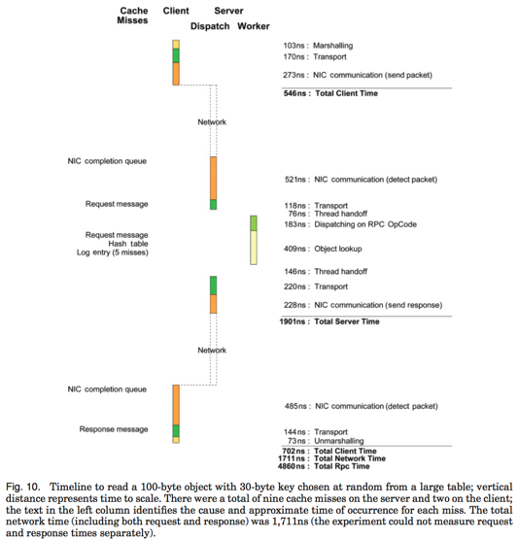

The figure is a very careful analysis of the execution of a RamCloud client talking to a RamCloud server.  You don't need to understand the figure in detail, but what's instructive is that 
 and the main focus is the number of cache misses incurred rather than the number of instructions, the number of memory operations, or the amount of data accessed.  Focusing on cache misses also means, implicitly, that this analysis is done in terms of cache lines rather than byte or words.

## Language Support

The experiments above show that alignment and struct layout can affect the performance of toy programs, but do these kinds of details really make any difference in real code?  They do!

How can we tell?  Two ways:

1.  We could go and write some high-performance systems and watch as alignment-related performance problems appear. 
2.  We can look at the tools that languages provides to deal with these issues.

#1 is lots of fun and I recommend it, but it takes a long time and we only have one quarter.  But there are three programming assignments left...

Let's look at #2.  For a long time, compiler writers and language designers have realized that memory layout and alignment is important, so they have provided support in the language to help programmers deal with this.

### Struct Initialization In C

Since the early versions of C, you can initialized a struct like this:

```C

struct Foo {
    char a;
    int b;
    char c;
};

Foo foo = {7,4,3};
```

Which will set `foo.a = 7`, `foo.b = 4`, and `foo.c = 3`.  We'll call this "positional initialization" or PI.  I think PI is super-unreadable, but it has an even bigger problem:  If you change the layout of `Foo` to improve it's cache efficiency, you have to update every static initialization of a `Foo` and there's no way for the compiler to tell if you missed one.  So the C99 standard gave us the "designated initialized":

```
Foo foo = {.a = 7, .b=4, .c=3};
```

This features appears as a gcc extension before it showed up in the C standard, and it's main use case was making easier to adjust struct layouts for memory-efficiency reasons.  For instance, in the unaligned access example above, we could move `MM.h` to be near `MM.a` and reduce the effects of poor alignment.

### C++ Object Alignment

Usually, the compiler can do a good job of aligning your structs, but there are cases where the programmer needs to force a structure to be aligned to a particular size.  The old fashioned way to do this was by wrapping `malloc()` (the C version of `new`) to create a new memory allocation function that could return memory at the desired alignment.  Writing such a function is a moderately interesting programming exercise.

Since 2001, C has had support for aligned allocation through `posix_memalign()`.

C++ has a more elegant solution and allows you to annotate the type with its alignment requirement using `alignas()`:

```C++

struct alignas(32) Foo {
    char a;
    int b;
    char c;
};
```

Which guarantees that all instance of `Foo` will be so aligned to 32 bytes.

For both `posix_memalign()` and `alignas()`, the alignment value must be a power of 2.  Other alignments are not generally useful.

# Latency and Bandwidth

Latency and bandwidth are two fundamental measures of memory performance.

* Latency -- in seconds (or sometime cycles) -- measures the time it takes for a single memory access to complete.  
* Bandwidth -- measured in bytes, megabytes, or gigabytes per second -- is the amount of data the processor can access per unit time.

Caches can improve both latency and bandwidth:  The L1 cache has lower latency and higher bandwidth than the L2.   The L2 out-performs the L3 on both metrics, and the L3 is better than DRAM on both metrics.

Let's start by taking some baseline measurements of the the bandwidth and latency capabilities of our test machine.  We'll start with DRAM.

## Measuring DRAM Latency and Bandwidth

Before we measure DRAM's performance, we should be precise about what exactly we mean by "latency" and "bandwidth" for DRAM.

For DRAM latency, we mean the number of seconds it takes for a load instruction to retrieve data assuming that the load misses in _all_ levels of the cache.  This means that the memory request "goes all the way to memory" and has to come all the way back.

For DRAM bandwidth, we mean the maximum number of bytes the processor can read  or write per second from DRAM rather than from any of the caches.  This means that that the only bytes that count for DRAM bandwidth are those read or written as part of a cache miss.

Measuring these two values is surprisingly difficult and would make a very good (and pretty challenging) programming assignment for a graduate-level architecture course.  It's made more difficult in modern machines by the presence of multiple processors, multiple DRAM interfaces, multiple caches, and multiple cores.  We'll discuss some of this complexity in more detail when in future labs when we address the impacts of parallelism, but for now we will stick the simplest version of these questions.

Given the difficulty of measuring these values, we will rely on Intel's [Memory Latency Checker](https://software.intel.com/content/www/us/en/develop/articles/intelr-memory-latency-checker.html).  It can perform a huge array of measurements, but we'll just do two:

In [ ]:
!cse142 job run --lab caches 'mlc --bandwidth_matrix; mlc --latency_matrix'

The output is a little verbose, but you should see two numbers that look like measured values rather than documentation.  They are both for 'Numa node' 0.  The first number is the bandwidth in MB/s.  The second is latency.

<div class="question completeness">

<div class="question-text">

Fill in the table below with the values you measured.
</div>

<div class="answer">

| metric | value | 
|--------|-------|
| Latency (ns) | | 
| Latency @ max clock rate (cycles, for our processor) | |
| Latency @ min clock rate (cycles, for our processor) | |
| Bandwidth (GB/s) |  |
    
</div>
</div>

<div class="solution">

The data's a little hard to find in the output of `mlc`, but it looks like this:
    
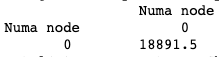
    
The data is an array and the data show is actually the bandwidth or latency between two "numa nodes" (don't worry about what a numa node is.  We'll come back to that in lab 4 or 5).  Our systems only have 1 numa, so the matrix  is just 1x1.  
    
The output tells us that `mlc` measures BW in MB/s, which is an unusual metric. To get GB/s, divide by 1000.
    
The latency value is already in `ns` but we also need it in cycles for the max and min clock rate of our processor.  Recall from Lab 1 that the min clock rate is 800MHz.  So the latency in cycles is `mlc_latency/(1/800e6)`. I measured the latency as 61.3ns, so that gives 49.3 cycles (don't forget about "nano").

The max frequency for our processor without TurboBoost is 3.5GHz, which gives a memory latency of 208 cycles!

</div>

Let's see what kind of hardware is providing this kind of performance.  To do this we'll use `dmidecode`, a utility to read the systems DMI table.  The DMI table is populated by the system's BIOS (the software runs immediately after you turn the computer on) to describe the hardware available.  DMI stands for "Desktop management interface" which is may be the least descriptive name for anything we'll use in the course. Everyone just calls it the "DMI table".

Anyway, `dmidecode` will dump all sort of interesting information about the system, but we'll pass `-t memory` to just ask it about the DIMM memory modules installed.  We'll also use grep to filter out some extraneous information:

In [ ]:
!cse142 job run --lab caches 'dmidecode -t memory > dmi_output.txt'
!grep -v 'Not Specified\|Unknown\|None' dmi_output.txt

There's a lot of information here, but let's walk through it:  Each entry in a DMI table has a type and a unique ID number or "Handle".  Type 0x17 is a memory module (or at least a slot for a memory module).  Type 0x11 is a "memory array" (for me it shows up as Handle 0x0011).  Our system has one memory array with 4 DIMM slots (Handles 0x0020-0x0023), but only one of them  (0x0021 for me) is populated. 

We can see that this module is 16GB in side, is manufactured by Micron, runs at a supply voltage of 1.2V, is DDR4, and runs at 2667MT/s.

MT/s stands for mega-transfers per second and measures how often data flows across the 64-bit memory bus.

<div class="question completeness">

<div class="question-text">

What is the peak memory bandwidth of our system?  What fraction of the peak bandwidth was `mlc` able to attain?
    
</div>

<div class="answer">

| metric | value | 
|--------|-------|
| Peak bandwidth | | 
| `mlc` % of peak  | | 

</div>
</div>

<div class="solution">

The memory bus 64-bits wide, which is 8 bytes.  We can compute the peak bandwidth by multiplying the transfer rate by the bus width:  8B/transfer*2667MT/s = 21336MB/s = 21.336GB/s.
    
We just divide `mlc`'s peak bandwidth by this number to the percent of peak.  For me that 18.891/21.336 = 88%.  That's pretty respectable.  It's really hard to get much closer to the peak bandwidth than that.
    
</div>

### Is DRAM Fast?

60ns is an almost unimaginably short period of time, and 18GB/s seems like a lot of data, but we need to think about this relative to the processor.  If you look back at the the `CPI` measurements you collect for Lab 1, you'll probably find CPI values as low as 0.5.  At 3.6GHz, that means our processor is executing around 7 billion instructions per second or, on average, one instruction every 0.166ns.  So 60ns is about 360 instructions.

For bandwidth, the situation is not great either.  On average about 20% of instruction access memory and every instruction must be loaded from memory to execute.  The average length of an x86 instruction is about 2 bytes and for simplicity, let's assume all memory accesses are 4 bytes.  That means that, on average, each instruction needs `2 + 0.2 * 4 = 2.8` bytes of memory.   

Let's compare that to what our measurements show:  18GB/s divided by 7 Billion instructions per second is about 2.6 bytes per instruction.  Not far off!  However, recall from lab one that our processor actually 6 cores! And the memory bandwidth from it's single memory channel will be shared among all of them.

We should also keep in mind that our machines are memory-poor:  Campus bought them to be as cheap and compact as possible.  So they are physically small (so they only have 4 memory slots) and campus only ordered one DIMM for each.

We will need a way to get higher bandwidth and lower latency.


## Measuring Cache Latency and Bandwidth

Caches reduce latency and increase bandwidth.  Let's  refresh our memory about the machine we are running on and see how large this effect is.

### The Caches we Have

Run the cell below remind yourself how large our L1, L2, and L3 caches are.

In [ ]:
!cse142 job run --force lscpu

### Cache Latency

We will use a different tool to measure cache latency.  This one is called `lat_read_rd` and it's part of set of system benchmarks called [`lmbench`](http://lmbench.sourceforge.net/).  `lat_mem_rd` measures the latency for repetitive accesses large and larger arrays.  For arrays that fit in the L1 cache, the average latency of these accesses is the L1 cache latency.  For arrays bigger than the L1 but that fit in the L2, it's the L2 cache latency.  Likewise, for L3.

<div class="question optional">

<div class="question-text">

How would you implement `lat_mem_rd`?
    
</div>
</div>

<div class="solution">
    
Helpully, the man page will tell you:
</div>

In [ ]:
!man lat_mem_rd

<div class="_solution">

Sound familiar?
    
</div>

Recall from Lab 1 that our processor has a 32KB L1, a 256KB L2, and a 12MB L3.  Usually, I'd have you run `lat_mem_rd` but it takes a long time to run and the output format is annoying, so here are the results:

In [ ]:
df = render_csv("lat_mem_rd.csv")
df["size_bytes"] = df["size_MB"]*1024*1024
plotPE(df=df, what=[("size_bytes", "latency_ns")], lines=True, logx=2, logy=2, log_autoscale_x=False, log_autoscale_y=False)
df

The "stair step" pattern you see is the jump in latency as data accesses start being served out of the slower and slower, layers of the memory hierarchy.   The steps occur roughly we expect them to:  32kB (L1 to L2), 256kB (L2 to L3), and 12MB (L3 to DRAM).  For larger sizes things get noisier so the "steps" aren't as crisp.

Here's the raw data:

In [ ]:
display(df[["size_bytes", "size_MB", "latency_ns"]])

<div class="question correctness points-4">

<div class="question-text">

Based on this graph, give the latencies for each of the caches.
</div>
    
<div class="answer">

| Level of the memory hierarchy | latency (ns) |  latency (Cycles) |  
| ------------------------------|---------|-| 
| L1  | |   |
| L2 | |  |
| L3 | |  |
| Main memory | | |
    
</div>
    
</div>

Happily, both `mlc` and `lat_mem_rd` agree on the main memory latency.

We can also check how our measurements compare to the processor specifications.  For the L1 cache, Intel has disclosed that the minimum latency for the L1 read is 4 cycles.  That should match the value you computed above.

As far as I know, Intel has not release a similar value for the L2 and L3.

### Cache Bandwidth

We don't have a handy tool for measuring cache bandwidth.  Maybe we'll build one as a future programming assignment...

We do however, have some technical details about about processor, so we can calculate what the peak (maximum attainable) cache bandwidth should be.

Skylake processors (of which our CPU is an example) can execute 2 64-byte loads and 1 64-byte store per cycle.  At 3.5GHz, this works out to `2*64*3.5e9 = 417GB/s` for loads and `213GB/s` for stores for a total 625GB/s.

The L2 cache provide one 64-bytes load _or_ store per cycle for `213GB/s.`

I don't have any information about the L3. 

###  Are the Caches Fast?

They are certainly better than DRAM -- the L1's latency is `61/1.147 = 52.3` times lower than DRAM, and bandwidth (in our system with one bank of DRAM) is `625/18.8 = 33` times higher.  Not only that, remember that we have six cores, so the total L1 cache bandwidth is `625GB/s * 6 = 3.7TB/s`.

However, the minimum load latency -- 4 cycles -- is still pretty high, considering that it's 4 times longer than the latency for a simple integer arithmetic operation (add, sub, etc.).  That means that having lots of load instructions can have a significant impact on CPI -- remember that unoptimized code from Lab 2 with all accesses to local variables on the stack?  The 4 cycle L1 latency is part of why `-O0` is so slow.

Caches are also slow compared to the register file.  Skylake's register files have a total bandwidth (at 3.5GHz) of something like 5TB/s (although it's very hard to fully utilize it.) per core (or 30TB/s across all 6 cores).  The register file latency is a little hard to quantify in a way that is comparable to cache latency, but 1/2 a cycle is a reasonable approximation.

The register file is also quite large:  The total size is about 1kB.   It's reasonable to think of the register file a software-managed, "L0" cache.

# Locality In Space and Time

Caches improve program performance by exploiting the fact that memory accesses are not random: Programs access memory in patterns and there is a lot of repetition in what programs do and a lot of similarity how programs behave at different times.  This is not surprising since, programs are written languages with constructs like loops and function calls:  These constructs naturally give rise to patterns because they cause the same code to execute repeatedly.

Let's take a look at a real program to see what this regularity looks like in real life.  The command below will collects a trace for the first 10 million memory accesses as `g++` starts compiling a complex program. (If you're curious, the program is `cc1plus`, the core of `g++`).

There are no tags in the trace, so finding things is hard.  Here's what todo:

1.  Freeze the x-axis (you'll just zoom in and out vertically)
2.  Select the zoom-to-region tool.
3.  Select one of the horizontal lines that visible in the initial view of the trace.
4.  Repeatedl zoom in on one of the visible horizontal lines.  Do this between 4 and 7 times. Eventually details will emerge.
5.  Reset the zoom and look at a different line.

For example:

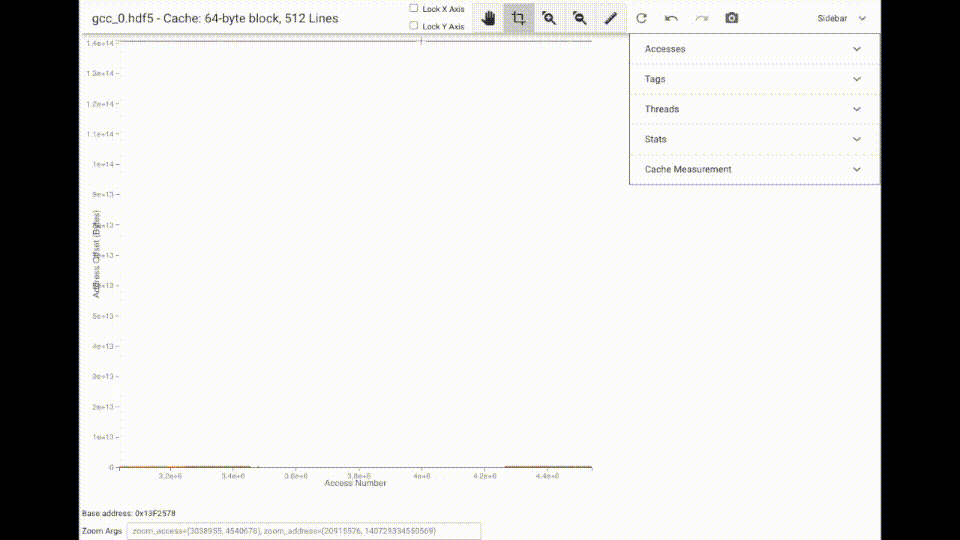

In [ ]:

!mtrace --trace gcc --memops 10000000 --skip 10000000 -- /usr/lib/gcc/x86_64-linux-gnu/8/cc1plus -quiet -v -I /cse142L/cse141pp-archlab/libarchlab -I /cse142L/cse141pp-archlab -I /usr/local/include -I /cse142L/CSE141pp-SimpleCNN/googletest/googletest/include -I /cse142L/CSE141pp-SimpleCNN -I build/ -I /cse142L/CSE141pp-Tool-Moneta/moneta/ -I . -imultiarch x86_64-linux-gnu -MMD build/fiddle.d -MQ build/fiddle.s -D_GNU_SOURCE -D_REENTRANT fiddle.cpp -quiet -dumpbase fiddle.cpp -mtune=generic -march=x86-64 -auxbase-strip build/fiddle.s -g -g0 -O3 -Wall -Werror -std=gnu++11 -version -p -fPIC -o build/fiddle.s -fstack-protector-strong -Wformat-security
show_trace("./gcc_0.hdf5", layer_preset=["accesses-read", "accesses-write"])

Go exploring a little bit.  Places to look:

1. The stack:  Keep zooming in on the top-most horizontal line in the plot.
2. The Heap: Zoom in on the bottom-most line until it resolves into to several lines.  Then, zoom in on the top one.

Things to look for:

1. Areas with repeated patterns of memory access.
2. Memory locations that are accessed frequently
3. Areas (in space and time) where accesses appear random.
4. Periods of sequential access.

If you find something interesting, click the camera icon to grab a screen capture.

Let's look at locality in a more controlled environment.

## Spatial Locality

As you should recall from lecture, _spatial locality_ is a property of a program (or part of a program) where it accesses memory locations nearby locations it has accessed recently.  Let's see how spatial locality can affect performance.

Here's a simple test program that accesses a 1-dimensional tensor at different "strides".  The "stride" of a sequence of accesses is just the distance between consecutive accesses.  So, "stride 1" means accessing each element, and "stride 2" means accessing every other element.  The outer loop ensures ensures that the total number of accesses the loop perform remains the same, regardless of stride size).

Examine the code below, and then answer these question:

In [ ]:
t = fiddle("stride.cpp", function="stride", name="spatial", opt="-O1",
code=r"""
#include"pin_tags.h"
#include"CNN/tensor_t.hpp"
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* stride(uint64_t * data, uint64_t size, uint64_t arg1) {
    tensor_t<uint32_t> t(size,1,1,1, (uint32_t *)data);
    TAG_START("init", t.data, &t.as_vector(t.element_count()), true);

    for(uint i = 0; i < arg1; i++) {
        for(uint x = 0; x < size; x+=arg1) {
            t.get(x,0,0,0) = x;
        }
    }
    
    TAG_STOP("init");
    return data;
}

FUNCTION(one_array_1arg, stride);
""")
compare([t.source, t.cfg])

<div class="question completeness">

####  How many misses-per-instruction would you expect for `stride == 1`?  How about `stride == 8`?  Assume `size` is very large and that cache lines are 64 bytes. 
  
<div class="answer">

**`stride == 1` MPI:** 

**`stride == 8` MPI:** 

**`stride == 32` MPI:** 

</div>
</div>

<div class="solution">

Since a `uint32_t` is 4 bytes, there are 16 of them in a cache line.  The first time we access an element in a new cache line, we will get a cache miss.  For stride-1 accesses, this will occur once every 16 accesses or $1/16 = 0.0625$ times per memory instruction (on average).  There are 7 instructions in the loop body in the assembly above and just the `movl` is a memory operation, so $1/7 = 0.142$ of instructions are memory operations.  To get the number of misses per instruction, we can multiply these two values together to get $1/16 * 1/7 = 0.00892$ misses per instruction.

For stride-8 accesses, the analysis is the same except that instead of touching a new cache line every 16th memory access, we will touch a new cache every other access.  For instance, on iteration 0, we will access the first element of the first cache line that holds the tensor (miss).  On the second iteration, we will access the 8th `uint32_t` in that cache line (hit).  On the third iteration, we will access the first element in the next cache line (miss) and so on.  So here we will have $1/2 \times 1/7 = 0.0714$ misses per instruction.

For stride-32, the distance between consecutive accesses is 128 bytes which is larger than a cache line, so every access will me a miss.  In this case, we will have $1 \times 1/7 = 0.142$ misses per instruction.

</div>


Let's see if those predictions match reality.  Run the cell below.  It'll run the code above.

In [ ]:
t = fiddle("stride.cpp", function="stride", name="spatial", run=["perf_count"], tagged_only=True, opt="-O1", 
           cmdline=f"--size {1024*1024*128} --arg1 1 2 4 8 16 32 64 --iters 10", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")
compare([t.source, t.cfg])
#show_trace(t.mtrace, show_tag="init")

display(render_csv("spatial.csv", columns=["function","size", "arg1", "L1_MPI", "L1_cache_misses"]))
plotPE("spatial.csv", lines=True, what=[("arg1", 'L1_MPI')])

In [ ]:
!cse142 job run --lab caches './fiddle.exe --lib ./build/stride.so --function stride --tag-functions false --stats spatial.csv --stat-set L1.cfg --MHz 3500 --size 134217728 --arg1 1 2 4 8 16 32 64 --iters 10'

<div class="question completeness">

#### Do the measurements match our predictions?  Does anything seem surprising about the results?
    
<div class="answer">
    
</div>
</div>

Of course, it's not really the misses we are worried about -- it's the impact on performance.

Recall what happens on a cache miss:  Instead of having accessing the data in the cache, the processor must go down the memory hierarchy.  In the worst case, this means going to main memory, which can easily take 100s of cycles.  Let's imagine it's 200 cycles.  What will the impact be on CPI?



For the next time account for the 4-cycle latency for hits in the problem.  If you do, this prediction is much closer to the result.

Use a value for miss latency is more closely matches the actual value.

<div class="question correctness points-2">

<div class="question-text">
    
If a cache miss increases memory instruction latency by 200 cycles, how much should CPI increase between a stride of 1 and a stride of 64 (based on the data above)?
    
</div>
    
<div class="answer">


    
</div>
</div>

Here's how it actually played out:

In [ ]:
display(render_csv("spatial.csv", columns=["function","size", "arg1", "IC", "CPI", "CT", "ET", "L1_MPI", "L1_cache_misses"]))
plotPE("spatial.csv", lines=True, what=[("arg1", 'L1_MPI'),("arg1", 'CPI'),("arg1", 'ET')])

There's no particular reason to expect these number to match your calculation in the question above.  We don't know exactly how long an L1 cache miss takes.  200 cycles is a guess, but in both cases the large impact of cache performance on execution time should be clear.


## Temporal Locality

We'll discuss temporal locality in the next lab.

# Programming Assignment

Your programming assignment for this lab is to implement a memory allocator.  You've used memory allocators a lot:  in C++ you access them via `new` and `delete`.  In C, it's `malloc()` and `free()` (which `new` and `delete` call internally).  The default implementation of `malloc()` and `free()` are general purpose:  they are reasonably fast and can allocate data of any size.  However, many applications need to allocate many, many objects very quickly, so a general-purpose allocator is too slow.  In these cases, it makes sense to implement a specialized memory allocator because they can be much faster.  

In this lab, you'll be implementing a specialized memory allocator that has these basic characteristics:

1.  It can only allocate objects of a single size.
2.  It will ensure those objects are aligned to configurable size.
3.  The allocator will be an object that can allocate and deallocate objects using a simple interface (see below).
4.  When the allocator is deleted, it will automatically deallocated all objects that are still allocated.

Here's the reference implementation:

In [ ]:
render_code("ReferenceAllocator.hpp")

First, note that it's a template class that takes two parameters:

* `T`: the type it will allocate.  You can assume the size of `T` can be up to 4096 bytes.
* `ALIGNMENT`:  The alignment of the allocations it will make.  Alignment size can be powers up 2 up to 4096 bytes (1, 2, 4, 8, 16, etc.).

The allocator has just four methods:

* `ReferenceAllocator()`:  the constructor.
* `alloc()` allocates and returns an instance of `T`.
* `free()` deallocates `p`, a previously allocated instance of `T`.
* `~ReferenceAllocator()`:  The destructor for the allocator.  It needs to clean up all the memory the allocator manages.

It also defines `ReferenceAllocator::ItemType`,  which let's us access the type the allocator allocates and `ReferenceAllocator::Alignment` which gives us access to the alignment size.

The implementation above just relies on the standard library's alignment-aware interface to the general-purpose allocator.  This means it's not optimized to exploit the fact that we only need to allocate a single size of object, and this is where the big optimization opportunities lie.

Your allocator will not rely on any of the normal memory-allocating library calls.  Instead will use a very simple allocator to allocate memory in bulk from the operating system.  The interface is called `ChunkAlloc`: 

In [ ]:
render_code("ChunkAlloc.hpp")
render_code("ChunkAlloc.cpp")

`ChunkAlloc` gets memory the same way `malloc()` does:  By calling  the `mmap()` system call which stands for "memory map".  `mmap()` is a great tool and can do many things.  You can read about it [here](https://man7.org/linux/man-pages/man2/mmap.2.html), but it's not necessary for the lab.  What is important for our purposes is that `alloc_chunk()` will return a 128kB region of memory that is 4kB-aligned.


## Detailed Requirements

You're going to build your own version of `ReferenceAllocator` called `SolutionAllocator`.  You'll find a copy of `ReferenceAllocator.hpp` in `SolutionAllocator.hpp`.  Do your work there.

Now that you understand the basics of how `ReferenceAllocator` works, here's the detailed list of requirements for `SolutionAllocator`:

1.  All addresses that `SolutionAllocator::alloc()` returns must be aligned to `ALIGNMENT` so `addr % ALIGNMENT == 0`.
2.  All addresses that `SolutionAllocator::alloc()` returns must point to at least `sizeof(T)` bytes of memory.
3.  `SolutionAllocator::alloc()` needs to set all bytes of memory that the instance of `T` will occupy to zero before constructing `T`.
4.  `SolutionAllocator::alloc()` needs to construct an instance of `T` in the memory using the in-place `new` operator (see below).
5.  `SolutionAllocator::alloc()` cannot return the same pointer twice unless the pointer has been deallocated with `SolutionAllocator::free()` first.
6.  After the destructor completes, `SolutionAllocator` must have called `free_chunk()` for every chunk it allocated with `alloc_chunk()`.  I.e., `get_allocated_chunks()` must return 0.
8.  You are free to use the STL data structures for the internals of `SolutionAllocator`, but `alloc()` may not return any memory that is a part of an STL container.
7.  The only mechanism you can use to allocate memory is `alloc_chunk()/free_chunk()`.  No calls to `malloc()` (or other functions from the standard library that allocate raw memory) or `new` (other than the "in place" version.) to allocate the space `SolutionAllocator` will return.  
10.  Your allocator must recycle:  If memory is returned to it via `free()`, your allocator should reallocate that memory before requesting new memory via `alloc_chunk()`.  This prevents your allocator from continually allocating new memory, which is very fast, but not a realistic solution.

`ReferenceAllocator` already satisfies all of these except the last two: `ReferenceAllocator` uses `posix_memalign()` which is forbidden in your solution.  With respect to recycling, I'm not sure how `posix_memalign()` works internally, so I'm not sure how it recycles, but it does something reasonably efficient.  You'll find that removing `posix_memalign()` and meeting the above criteria will require you to rewrite most of the code in `SolutionAllocator.hpp`.

## Evaluation

Your implementation will be evaluated based on correctness and performance.  Your implementation of `SolutionAllocator` must pass the tests in `run_test.cpp` which cover the requirements listed above.   

The performance portion is based on the average score over several benchmarks in `Allocator.cpp`.  Details of the grade calculation are given under "Final Measurement" below.

The code for the benchmarks is in `Allocator.cpp`.  The code is below.  The key functions are `bench()`, `microbench()`, `exercise()`, and `miss_machine()`.  Here's what they do:

* `microbench()` just calls `alloc()` many times and records the execution time.  Then it does the same for `free()`.
* `exercise()` allocates a bunch of objects, deletes some at random, allocates some more, deletes some at random, etc.  This puts your allocator into a "warmed up" or "well-used" state to approximate how it would behave in a long-running program.
* `bench()` measure the execution time of `exercise()`.
* `miss_machine()` measures the speed of a specialized version of the miss machine that tests how well your allocator manages spatial locality (more below)

The `run_*` functions near the bottom are wrappers to record information about the parameters used to run each benchmark.  The functions marked `extern "C"`  at the bottom of `Allocator.cpp` allow us to invoke the benchmarks from the command line and run the tests with a variety of parameters.

In [ ]:
render_code("Allocator.cpp")

## `miss_machine()`

`miss_machine()` is the most interesting of the three benchmark functions because it addresses one of the subtle problems that can arise with a memory allocator.

Because the memory allocator controls the layout of a program's memory, it can have a strong impact on how a program accesses memory.  For instance:

1.  If the allocator is poorly designed (or unlucky) it might arrange memory so that there are many conflict misses.
2.  The depending on how effectively the allocator reclaims space that is freed, it may waste space.
3.  How the allocator places objects can affect which objects are close enough to benefit from spatial locality.

The `miss_machine()` function in `Allocator.cpp` explores the third issue.  Here's the code again:

In [ ]:
render_code("Allocator.cpp", show=("//BEGIN", "//END"))

Here's what the benchmark does. 

1. It create an allocator and warms it up with `exercise()`.

2. It builds a miss machine out of links allocated one-at-a-time from your allocator.  This is different than description of the miss machine given earlier in the lab:  In that case we allocated the links in an array, guaranteeing good spatial locality.

3. Then it measures the execution time of a call to `do_misses()`, which traverses the miss machine.

Read through the code and comments carefully to understand it.

We are going to run `miss_machine` with `count = 4096`.   Since each `MissingLink` is 8 bytes, 4096 links _should_ fit in the L1 cache, since `4096*8 = 32*1024`.  Let's see how the allocators do:

In [ ]:
!make alloc_main.exe
!cse142 job run --lab caches --force "./alloc_main.exe --size 4096 --stats miss_machine.csv --MHz 3500 --stat-set ./L1.cfg --function miss_machine_solution miss_machine_starter"


In [ ]:
render_csv("miss_machine.csv", columns=["function", "count", "ET", "L1_MPI" ])

I get an `L1_MPI` of 0.143.  Let's take a look at the CFG for `do_misses()`:

In [ ]:
do_cfg("alloc_main.exe", symbol="do_misses")

As you can see, there are only 5 instructions and 3 of them are accesses.  However, two of them are copying the same value to and from the stack over and over (how inefficient!  you should fix that!), so they will almost always hit.   That leave 1 load which accounts for 0.2 of the instructions in the loop body.  Since MPI of 0.14, means that about 0.14/0.2 = 0.7 (or 70%) of the loads are missing.

Your task is to speed up `do_misses()` and the best way to do that is to reduce MPI by allocating `MissingLinks` in such a way that you maximize spatial locality across the miss machine.

A couple of things to keep in mind:

1. This benchmark is only 12.5% of your grade, and your work on the other benchmarks will get you most of those points.  It's also the hardest part.  Work on it last.

2. A locality-aware allocator is probably more complex than a non-locality-aware allocator.  If you add too much complexity, it will reduce performance on the other benchmarks.

3. Remember that the key to spatial locality is to fit your data (in this case the links in the miss machine) into the smallest possible number of cache lines possible.


## Useful C++

C++ likes to keep you safe by not letting you convert pointers to integers or letting you convert pointers from one type to another.  However, memory allocators need to break the rules occasionally to transform untyped bytes into objects.  The main tool for this is `reinterpret_cast<>()` and the "in place" `new` operator.  `ReferenceAllocator` provides an example of how to use both mechanisms.

### `reinterpret_cast<>()`

 `reinterpret_cast<>()` let's you change a values from one type to another as long as they are the same size.  So you can do this:

```C++
char *x;
int *y = reinterpret_cast<int *>(x);

// or 

void * x = alloc_chunk();
T * t = reinterpret_cast<T*>(x);
```

If you are familiar with C's `(T*)(x)` casting syntax, `reinterpret_cast` is equivalent, but preferred because it's easier to spot in code.

A related tool is `uintptr_t`, which is an unsigned integer that is the same size as a pointer.  So you can increment a pointer by one byte doing this:

```C++
int * x = new int;
uintptr_t n = reinterpret_cast<uintptr_t>(x);
n += 1;
x = reinterpret_cast<int *>(n);
```

Note that this is different than;

```C++
int *x = new int;
x++;
```

Since, under C++'s pointer arithmetic rules, if you increment a pointer of type `T*`, it actually increases the address by `sizeof(T)` (i.e., 4 bytes for an `int`).


### In-Place `new`

If you call `new T`, C++ will allocate some memory to hold a new instance of `T` and then run `T`'s constructor on it.  But what if _you_ want to decide where to construct the new instance? 

In that case you can say something like this:

```
void * p = alloc_chunk();
new (p) T;
```

To construct a new instance of `T` "in place" in the memory pointed to by `p`.  Or, if you wanted to initialize an instance of `T` starting at the 11th byte after `p`, you could do this:

```
uintptr_t n = reinterpret_cast<uintptr_t>(p);
n += 11;
void *q = reinterpret_cast<void*>(n);
new (q) T;
```

Why would anyone ever want to do that?

## How To Do This Lab

Here's some tips about how to approach this lab.

### The Lifecycle of a Memory Allocator

Here are the basic steps that your memory allocator must accomplish over it's lifetime.

1.  Initialize itself and its internal data structures.
2.  Respond to calls to `alloc()`
    1.  If the allocator has recycled objects, initialize one and return it.
    2.  Otherwise, if the allocator has new (not recycled) memory on hand, initialize one object worth, and return it.
    3.  Otherwise, if the allocator has no memory on hand, call `alloc_chunk()`, and goto 2.2.
3.  Respond to calls to `free()`
    1.  Store the object somewhere so it can be recycled.
4.  On destruction, called `free_chunk()` to deallocate all the memory you allocated with `alloc_chunk()`.

### Main Challenges

Here are a list of the main challenges I see in implementing this PA.  

1.  Acquiring a large chunk of memory and dividing it into properly-constructed C++ objects.
2.  Ensuring the alignment of those objects is correct.
3.  Deciding which object to return for a given allocation.
4.  Freeing and recycling objects efficiently.
5.  Ensuring that all the chunks you allocate are freed by the destructor.
6.  Maximizing locality among allocated objects.

Solving each of these should give you a working solution.  The ordering above is a good way to approach it.

### Thing to Try

Here are some ideas about how to get started:

1.  The main difference between what you'll implement in `SolutionAllocator` and `posix_memalign()` is that `SolutionAllocator` only needs to allocate objects of a single size.  You can exploit this fact to improve performance.
2.  `alloc_chunk()` let's you allocate enough space to store many objects.  Since the objects are all the same size and alignment, you can calculate where each of instance of `T` will reside with the chunk.
3.  You need to recycle.  So, think about how you can efficiently store `free()`ed memory while it's waiting to be re-`alloc()`ed.
4.  You will need to choose the right data structures and algorithms to achieve good performance.  Think about what each data structure _needs_ to do and what operations are most important to performance.  Use the STL! (In Lab 2, I noticed many students implementing things that the STL already provides.  Don't re-invent -- or debug -- the wheel!)

Your overall score is based on your allocator's performance across eight benchmarks.  This might seem daunting, but the performance of the benchmarks is very correlated:  If you speed up your allocator for one of them, it will get faster for many of the others.

With that in mind, start with the simplest ones and go from there.  I'd proceed in this order:

1.  The `microbench` function.
2.  The `bench` function.
3.  The `miss_machine` function.

## Do Your Work Here

Below are the key commands you'll need to make progress on the lab.  Your solution should go in `SolutionAllocator.hpp`:

### Setting Optimization Flags

As in your last lab, you can set optimization flags in `config.make`:

In [ ]:
render_code("config.make")

### Compiling and Running

You can compile and the benchmarks locally using this command.  This is only useful for debugging.  Performance running locally is not very meaningful:

In [ ]:
!make alloc_main.exe
!./alloc_main.exe --size 320000 --function allocator_bench_solution allocator_bench_starter allocator_microbench_solution allocator_microbench_starter
!./alloc_main.exe --size 4096 --function miss_machine_solution miss_machine_starter

If you want to just run your solution in `SolutionAllocator.hpp`, remove the "starter" functions from `--function`

Here are the commands to run each benchmark in the cloud.

In [ ]:
!make alloc_main.exe
!cse142 job run --lab caches --force "./alloc_main.exe --size 320000 --stats microbench.csv  --MHz 3500 --stat-set ./L1.cfg  --function allocator_microbench_starter allocator_microbench_solution"
!cse142 job run --lab caches --force "./alloc_main.exe --size 320000 --stats bench.csv --MHz 3500 --stat-set ./L1.cfg --function allocator_bench_starter allocator_bench_solution"
!cse142 job run --lab caches --force "./alloc_main.exe --size 4096 --stats miss_machine.csv --MHz 3500 --stat-set ./L1.cfg --function miss_machine_starter miss_machine_solution"


### Running the Regressions

There's a test suite that your code must pass and that the autograder will run.  You can run it like this:

In [ ]:
!make run_tests.exe
!./run_tests.exe

### Looking at Raw Data 


In [ ]:
columns=["function", "bytes", "alignment", "count", "test", "ET", "L1_cache_misses", "L1_MPI"]
bench = render_csv("bench.csv")
bench["label"] = bench["function"] + " " + list(map(str,bench["bytes"])) + " " + list(map(str,bench["alignment"]))
microbench = render_csv("microbench.csv")
microbench["label"] = microbench["function"] + " " + microbench["test"]
miss_machine = render_csv("miss_machine.csv")
display(bench[["label", "bytes", "alignment", "count", "test", "ET", "L1_cache_misses", "L1_MPI"]])
display(microbench[["label", "bytes", "alignment", "count", "test", "ET", "L1_cache_misses", "L1_MPI"]])
display(miss_machine[["function", "count", "test", "ET", "L1_cache_misses", "L1_MPI"]])

### Drawing Graphs

In [ ]:
plotPEBar(df=bench, what=[("label", "ET")])
plotPEBar(df=microbench, what=[("label", "ET")])
plotPEBar(df=miss_machine, what=[("function", "ET"),("function", "L1_MPI")])

## Tools

These are some tools you might find useful as you optimize your implementation.  I encourage you to give some of them a try.

### Running Regressions

The test suite for your implementation in `run_test.cpp`.  It the code is a little dense because it uses Google's C++ [testing system](https://github.com/google/googletest) which (like C++) is powerful but complicated.

You can build and run the tests with

In [ ]:
!make run_tests.exe
!./run_tests.exe

It'll run all the tests, which can be a bit overwhelming.  To focus your work, you run one test at a time.  First list them:

In [ ]:
!./run_tests.exe --gtest_list_tests

Then you run a single test like so:

In [ ]:
!./run_tests.exe --gtest_filter=*alignment_test_ReferenceAllocator_4_16

### Debugging Regressions 

If a regression fails, `run_tests.exe` will tell you which test failed.  Here are some tips for debugging.  First, get a list of the tests:

One of them will be the test that failed.  Then you can debug in gdb (at a terminal again):

```
bash$ gdb run_tests.exe
(gdb) run --gtest_filter=*<name_of_failing_test> --gtest_break_on_failure
```
The `--gtest_filter` just runs one test.  and `--gtest_break_on_failure` will stop drop you into the debugger if the error occurs.


### Looking At Assembly

As you learned in the previous lab, name mangling makes it a little tricky to inspect the details of what the compiler does to C++ code, especially when it uses templates.  So let's see how we can track down the assembly for for your implementation.

The `Makefile` is set up to build assembly files (ending in `.s`) in the `build` directory.  All the assembly for `SolutionAllocator` and `ReferenceAllocator` (and a whole bunch of other stuff) will be in `Allocator.s`.   It's quite long: my version is 44,262 lines, so searching through it by hand is daunting.  To make matters worse, all the function names are mangled.

One solution to this is to `c++filt` to demangle the names and the use `grep` to find the symbols of interest (the `^` matches the beginning of the line`):

In [ ]:
!make build/Allocator.s
!c++filt < build/Allocator.s | grep '^SolutionAllocator'

You can see that there are several different versions of each method, one for each set of template parameters.  Unless you're doing something very sophisticated with your implementations, the assembly will all be basically the same.

You can now render the assembly here with:

In [ ]:
!make build/Allocator.s
render_code("build/Allocator.s", show="SolutionAllocator<MissingLink, 8ul>::alloc()", lang="gas")

### Looking at the CFG

Control flow graphs are easier to interpret than the assembly, but getting them for C++ functions is also a little complicated.  The tool that our CFG generator is built on uses its own name mangling scheme internally.  To get the names it uses for your functions you can use the command below.  We pass the executable to `cfg` along with `--filter` which takes a string to search for.  If you leave out `--filter` you will all 2890 symbols in the executable.

In [ ]:
!make alloc_main.exe
!cfg alloc_main.exe --filter SolutionAllocator --list

There's a one-to-one correspondence between these names the names we saw earlier.  You can render a CFG like so:

In [ ]:
do_cfg("alloc_main.exe", symbol="sym.SolutionAllocator_MissingLink__8ul_::alloc__")

### Profiling 

Profiling can be valuable tool in figuring out where your code is spending time.  

To profile your allocator, you need to recompile it with profiling enabled:

**NOTE:** Don't forget to rebuild without `GPROF=yes`. BUilding in support for gprof will slow down your code a bit.

In [ ]:
!make clean alloc_main.exe GPROF=yes 

You'll need to profile one type of benchmark at a time.  just run one of the lines below at a time.For good accuracy, you should profile in the cloud.  

In [ ]:
# Profile in the cloud
!cse142 job run --lab caches --force "./alloc_main.exe --size 32000 --stats microbench.csv  --MHz 3500 --stat-set ./L1.cfg  --function allocator_microbench_solution"
#!cse142 job run --lab caches --force "./alloc_main.exe --size 32000 --stats bench.csv --MHz 3500 --stat-set ./L1.cfg --function allocator_bench_solution"
#!cse142 job run --lab caches --force "./alloc_main.exe --size 4096 --stats miss_machine.csv --MHz 3500 --stat-set ./L1.cfg --function miss_machine_solution"


Either way, you get `gmon.out` which you can process with `gprof` to get something you can read (sort of):

In [ ]:
!gprof ./alloc_main.exe

The output is a big for Jupyter Notebook.  In a terminal you can do:

```
gprof alloc_main.exe | less -S 
```

Which will let you look at the file without wrapped lines.

### Debugging 

Your code will certainly have errors in it, and you'll need to debug.  Unfortunately, the Linux debugger `gdb` doesn't work inside the note book.  If you want to use it, you can do so at the terminal:

```
swanson-dev-192:/cse142L/labs/CSE141pp-Lab-Caches gdb alloc_main.exe
GNU gdb (Ubuntu 8.1.1-0ubuntu1) 8.1.1
Copyright (C) 2018 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.  Type "show copying"
and "show warranty" for details.
This GDB was configured as "x86_64-linux-gnu".
Type "show configuration" for configuration details.
For bug reporting instructions, please see:
<http://www.gnu.org/software/gdb/bugs/>.
Find the GDB manual and other documentation resources online at:
<http://www.gnu.org/software/gdb/documentation/>.
For help, type "help".
Type "apropos word" to search for commands related to "word"...
Reading symbols from alloc_main.exe...done.
(gdb) run --size 1024  --function allocator_bench_solution
Starting program: /cse142L/labs/CSE141pp-Lab-Caches/alloc_main.exe --size 1024  --function allocator_bench_solution
warning: Error disabling address space randomization: Operation not permitted
[Thread debugging using libthread_db enabled]
Using host libthread_db library "/lib/x86_64-linux-gnu/libthread_db.so.1".
registering function: allocator_bench_starter
registering function: allocator_bench_solution
registering function: allocator_microbench_starter
registering function: allocator_microbench_solution
Loading Native engine.
registering env: alloc_test
Running allocator_bench_solution
[Inferior 1 (process 20279) exited normally]
(gdb)
```

A few notes about debugging:  

1. Start with `allocator_microbench_solution`, it's much simpler.
2. Start with `alloc()`, since you have to `alloc()` before you can `free()`.
3. Turn down `--size`.  It's set large so it runs long enough to a good timing measurement.

The code for `alloc_main()` is a little complicated, so it can be hard to get the debugger to stop in your code.  Instead, set a breakpoint on the function you want to debug:

```
bash$ gdb alloc_main.exe
(gdb) break allocator_microbench_solution
(gdb) run --function allocator_microbench_solution --size 1024
(gdb) list
```

which will give you something like this:
 
```
$ gdb alloc_main.exe
GNU gdb (Ubuntu 8.1.1-0ubuntu1) 8.1.1
Copyright (C) 2018 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.  Type "show copying"
and "show warranty" for details.
This GDB was configured as "x86_64-linux-gnu".
Type "show configuration" for configuration details.
For bug reporting instructions, please see:
<http://www.gnu.org/software/gdb/bugs/>.
Find the GDB manual and other documentation resources online at:
<http://www.gnu.org/software/gdb/documentation/>.
For help, type "help".
Type "apropos word" to search for commands related to "word"...
Reading symbols from alloc_main.exe...done.
(gdb) break allocator_microbench_solution
Breakpoint 1 at 0x1d9f6: file build/Allocator.cpp, line 179.
(gdb) run --function allocator_microbench_solution --size 1024
Starting program: /cse142L/labs/CSE141pp-Lab-Caches/alloc_main.exe --function allocator_microbench_solution --size 1024
warning: Error disabling address space randomization: Operation not permitted
[Thread debugging using libthread_db enabled]
Using host libthread_db library "/lib/x86_64-linux-gnu/libthread_db.so.1".
registering function: allocator_bench_starter
registering function: allocator_bench_solution
registering function: allocator_microbench_starter
registering function: allocator_microbench_solution
Loading Native engine.
registering env: alloc_test
Running allocator_microbench_solution
Breakpoint 1, allocator_microbench_solution (count=1024, seed=3735928559) at build/Allocator.cpp:179
179		run_microbench<SolutionAllocator<uint[4], 8>>(count, seed);
(gdb) list
174	FUNCTION(alloc_test, allocator_microbench_starter);
175
176
177	extern "C"
178	uint64_t * allocator_microbench_solution(uint64_t count, uint64_t seed) {
179		run_microbench<SolutionAllocator<uint[4], 8>>(count, seed);
180		return NULL;
181	}
182	FUNCTION(alloc_test, allocator_microbench_solution);
(gdb)
```





There's a pretty good `gdb` [tutorial here](https://www.cs.cmu.edu/~gilpin/tutorial/).

### Tracing Your Allocator With Moneta

**Note:** I found Moneta to be most useful for the `miss_machine` benchmark, but not as much for the rest of the programming assignment.  If you don't find it useful, don't use it.

**Note:** The commands below rely on some tracing commands in `ChunkAlloc.cpp`.  This means you won't be able to use them until you've replace `posix_memalign()` with `alloc_chunk()` in `SolutionAllocator.hpp`.

**Note:**  The settings below assume optimizations are turned on.  Otherwise, the benchmark generates so many memory accesses, that the trace is too large to load.

In [ ]:
!make alloc_main.exe 
def my_mtrace(function, main=None, size=4096, memops=1000000):
    if main is None:
        main = function
    do_mtrace(main=main, memops=memops, trace=function, cmd=f"./alloc_main.exe --size {size} --function {function}".split())        
my_mtrace(function="miss_machine_solution", size=4096, memops=2000000)

In [ ]:

show_trace("./miss_machine_solution_0",  show_tag=["build_miss_machine", "miss_machine", "exercise"])
#show_trace("./miss_machine_solution_0",  show_tag=["exercise", "build_miss_machine", "miss_machine"])

## Final Measurement

When you are done, make sure your best allocator is called `SolutionAllocator` in `SolutionAllocator.hpp`. Then you can submit your code to the Gradescope autograder.  It will run the commands given above and compute your grade.

Your grade is based on your speed up relative `ReferenceAllocator` on the eight benchmarks. 

For each of them, there's a target speedup given the table below.  You get a score for each benchmark between 0 and 12.5, and the overall score is the sum of these scores.  For each function, the score is compute as `your_speedup/target_speedup * 12.5`.

For this lab, you don't get extra credit for beating the targets.  This will help ensure that your design in balanced:  You must do well at all 8 benchmarks to do well on the lab.

To get points, your code must also be correct.  The autograder will run the regressions in `run_tests.cpp` to check it's correctness.

You can mimic exactly what the autograder will do with the command below, and then run the next cell below to list them and the target speedups.

After you run it, the results will be in `autograde/bench.csv`, `autograde/microbench.csv`, and `autograde/miss_machine.csv` rather than `./bench.csv`, `./microbench.csv`, and `miss_machine.csv`.  This command builds and runs your code in a more controlled way by doing the following:

1.  Ignores all the files in your repo except `SolutionAllocator.cpp` and `config.make`.
2.  Copies those files into a clean clone of the starter repo.
3.  Builds `alloc_main.exe` from scratch.
4.  And then runs the commands for the benchmarks.
5.  It then runs `autograde.py` to compute your grade.

Running the cell below will do the same thing as the Geradescope autograder.  And the cell below shows the name and target speedups for each benchmark.  This takes 1-2 minutes to run.

In [ ]:
!make alloc_main.exe
!cse142 job run --take SolutionAllocator.hpp --take config.make --lab caches-bench --force  autograde

You can check the performance results like this:

In [ ]:
!./autograde.py --submission autograde --results autograde.json
from autograde import compute_all_scores
df = compute_all_scores(dir="autograde")[0]
display(df)
print(f"total points: {round(sum(df['capped_score']), 2)}/100")

The "capped_score" column contains the number of points you'll receive.

You can also inspect the autograder's output.

In [ ]:
render_code("autograde.json")

Most of it is internal stuff that gradscope needs, but the key parts are the `score`, `max_score`, and `output` fields.

All that's left is commit your code:

In [ ]:
!git commit -am "Solution to the lab."
!git push

If `git commit` tell you something like:

```
*** Please tell me who you are.

Run

git config --global user.email "you@example.com"
git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'prcheng@dsmlp-jupyter-prcheng.(none)')
Warning: Permanently added the RSA host key for IP address '140.82.112.3' to the list of known hosts.
Everything up-to-date
```

Then you can do (but fill in your @ucsd.edu email and your name):

In [ ]:

!git config --global user.email "you@example.com"
!git config --global user.name "Your Name"

# Recap

In this lab, you have seen how important memory alignment is and how the compiler lays out structs to enforce it.   You have also started to learn how to write cache-aware code and to think in terms of cache lines and cache misses rather than bytes and memory accesses as you reason about how your programs access memory.  You have measured spatial locality and seen how its presence or absence can affect performance. You have also implemented a memory allocator and seen how a memory allocator can affect the spatial locality of the data structures it allocates.

# Turning In the Lab

For each lab, there are two different assignments on gradescope:

1.  The lab notebook.
2.  The programming assignment.

There's also a pre-lab reading quiz on Canvas and a post-lab survey which is embedded below.

## If You Have Trouble

If it's near the deadline and you are having trouble turning in any part of your lab, you can fill out this form: https://forms.gle/ThHjESfbZRqqztXUA to let us know what's going on and provide us access to the work you have done prior to the deadline.

<div class="alert alert-block alert-danger">

**NOTE:** Filling out the form above _before_ the deadline is the _only_ mechanism available to receive credit without turning in the assignment on time.
    
</div>

If it's more than a day before the deadline, you can reach out via Piazza and hopefully we can get it sorted out.


## Reading Quiz

The reading quiz is an online assignment on Canvas.  It's due before the class when we will assign the lab.

## The Note Book

You need to turn in your lab notebook and your programming assignment separately. 

After you complete the lab, you will turn it in by creating a version of the notebook that only contains your answers and then printing that to a pdf.

**Step 1:**  Save your workbook!!!

In [ ]:
!for i in 1 2 3 4 5; do echo Save your notebook!; sleep 1; done

**Step 2:**  Run this command:

In [ ]:
!turnin-lab Lab.ipynb
!ls -lh Lab.turnin.ipynb

The date in the above file listing should show that you just created `Lab.turnin.ipynb`

**Step 3:**  Click on this link to open it: [./Lab.turnin.ipynb](./Lab.turnin.ipynb)

**Step 4:**  Hide the table of contents by clicking the

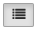

**Step 5:**  Select "Print" from _your browser's_ "file" menu.  Print directly to a PDF.

**Step 6:**  Make sure all your answers are visible and not cut off the side of the page.

**Step 7:**  Turn in that PDF via gradescope.

<div class="alert alert-block alert-danger">

**Print Carefully** It's important that you print directly to a PDF.  In particular, you should _not_ do any of the following:
    
1. **Do not** select "Print Preview" and then print that. (Remarkably, this is not the same as printing directly, so it's not clear what it is a preview of)
2. **Do not** select `Download as-> PDF via LaTex.  It generates nothing useful.
    
</div>

In gradescope, you'll need to show us where all your answers are.  Please do this carefully, if we can't find your answer, we can't grade it.

## The Programming Assignment

You'll turn in your programming assignment by providing gradescope with your github repo.   It'll run the autograder and return the results.

## Lab Survey

Please fill out this survey when you've finished the lab.  You can only submit once.  Be sure to press "submit", your answers won't be saved in the notebook.

In [1]:
from IPython.display import IFrame    
IFrame('https://docs.google.com/forms/d/e/1FAIpQLScHbK7yLlixJqdYsRnpvLLT_Ra8vdhmx8bE0KS50HYuiV4f4Q/viewform?embedded=true', width=800, height=2000)


Ignore this.